# importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import pointbiserialr, stats
from imblearn.over_sampling import SMOTE, ADASYN 

In [3]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


In [4]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [5]:
from mlens.ensemble import SuperLearner
from mlens.visualization import corrmat 


[MLENS] backend: threading


In [6]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [7]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

In [8]:
df = pd.read_csv('D:\datasets python\./insurance_claims.csv')

In [9]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [10]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    22-02-2015  Single Vehicle Collision  Front Collision   
996    24-01-2015  Single Vehicle Collision   Rear Collision   
997    23-01-2015   Multi-vehicle Collision   Side Collision   
998    26-02-2015  Single Vehicle Collision   Rear Collision   
999    26-02-2015                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

# Data Cleaning

In [11]:
missing_stats = []

for col in df.columns:
    missing_stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df.sort_values('percent_missing', ascending=False)

feature  unique_values  percent_missing  \
0            months_as_customer            391              0.0   
29                    witnesses              4              0.0   
22               incident_state              7              0.0   
23                incident_city              7              0.0   
24            incident_location           1000              0.0   
25     incident_hour_of_the_day             24              0.0   
26  number_of_vehicles_involved              4              0.0   
27              property_damage              3              0.0   
28              bodily_injuries              3              0.0   
30      police_report_available              3              0.0   
20            incident_severity              4              0.0   
31           total_claim_amount            763              0.0   
32                 injury_claim            638              0.0   
33               property_claim            626              0.0   
34                vehicle_claim            726              0.0   
35                    auto_make             14              0.0   
36                   auto_model             39              0.0   
37                    auto_year             21              0.0   
21        authorities_contacted              5              0.0   
19               collision_type              4              0.0   
1                           age             46              0.0   
9                   insured_zip            995              0.0   
2                 policy_number           1000              0.0   
3              policy_bind_date            951              0.0   
4                  policy_state              3              0.0   
5                    policy_csl              3              0.0   
6             policy_deductable              3              0.0   
7         policy_annual_premium            991              0.0   
8                umbrella_limit             11              0.0   
10                  insured_sex              2              0.0   
18                incident_type              4              0.0   
11      insured_education_level              7              0.0   
12           insured_occupation             14              0.0   
13              insured_hobbies             20              0.0   
14         insured_relationship              6              0.0   
15                capital-gains            338              0.0   
16                 capital-loss            354              0.0   
17                incident_date             60              0.0   
38               fraud_reported              2              0.0   

    percent_biggest_cat     type  
0                   0.8    int64  
29                 25.8    int64  
22                 26.2   object  
23                 15.7   object  
24                  0.1   object  
25                  5.4    int64  
26                 58.1    int64  
27                 36.0   object  
28                 34.0    int64  
30                 34.3   object  
20                 35.4   object  
31                  0.5    int64  
32                  2.5    int64  
33                  1.9    int64  
34                  0.7    int64  
35                  8.0   object  
36                  4.3   object  
37                  5.6    int64  
21                 29.2   object  
19                 29.2   object  
1                   4.9    int64  
9                   0.2    int64  
2                   0.1    int64  
3                   0.3   object  
4                  35.2   object  
5                  35.1   object  
6                  35.1    int64  
7                   0.2  float64  
8                  79.8    int64  
10                 53.7   object  
18                 41.9   object  
11                 16.1   object  
12                  9.3   object  
13                  6.4   object  
14                 18.3   object  
15                 50.8    int64  
16                 47.5    int64  
17           

In [12]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [13]:
df['policy_bind_year'] = pd.DatetimeIndex(df['policy_bind_date']).year

In [14]:
df['policy_bind_year']

0      2014
1      2006
2      2000
3      1990
4      2014
5      2006
6      2000
7      1990
8      1997
9      2011
10     2002
11     1999
12     1997
13     2012
14     1998
15     1992
16     2005
17     2004
18     2014
19     1992
20     2002
21     2005
22     1994
23     1991
24     1996
25     2013
26     1990
27     2002
28     1990
29     2014
30     2000
31     2008
32     2003
33     1992
34     1991
35     2010
36     2003
37     1993
38     2002
39     1997
40     1995
41     2012
42     2006
43     2003
44     2007
45     2006
46     1990
47     1990
48     2008
49     1997
50     2004
51     1994
52     2002
53     1994
54     2014
55     2007
56     2008
57     1995
58     1993
59     2005
60     1990
61     1993
62     2014
63     2008
64     2007
65     1993
66     2011
67     1990
68     1994
69     1994
70     2011
71     1998
72     1995
73     2002
74     2004
75     2001
76     2010
77     1992
78     2010
79     2013
80     1994
81     1997
82     2011
83  

In [15]:
df['incident_month'] = pd.DatetimeIndex(df['incident_date']).month

In [16]:
df['incident_month']

0       1
1       1
2       2
3      10
4       2
5       2
6       1
7       2
8       1
9       5
10      6
11      2
12      1
13      8
14      1
15      1
16      2
17      6
18      1
19      2
20      1
21     10
22     11
23      1
24      2
25      9
26      1
27      7
28      8
29      2
30      1
31      2
32      2
33      9
34     12
35      1
36      9
37      1
38      1
39      8
40      3
41      1
42      1
43     10
44      2
45      2
46      2
47     10
48      2
49      1
50      3
51      1
52      2
53      1
54      2
55      6
56      2
57      2
58      7
59      6
60     10
61     11
62     12
63      6
64      1
65      2
66      1
67      2
68     10
69      2
70      2
71      8
72     11
73      2
74      1
75      1
76      1
77      2
78      1
79      1
80      2
81      3
82      1
83      1
84      1
85      2
86      1
87      8
88      1
89      7
90      2
91      2
92      2
93      9
94      1
95      2
96      1
97      1
98      2
99      1


In [17]:
df['collision_type'] = df['collision_type'].replace("?", "undocumented")
df['police_report_available'] = df['police_report_available'].replace("?", "undocumented")
df['property_damage'] = df['property_damage'].replace("?", "undocumented")
df['auto_make'] = df['auto_make'].replace("Suburu", "Subaru")

In [18]:
df['incident_severity'] = df['incident_severity'].map({"Trivial Damage":0,
                                                       "Minor Damage":1,
                                                       "Major Damage":2,
                                                       "Total Loss":3
                                                      }).astype("int32")
df.incident_severity.value_counts()

1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64

In [19]:
df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
635           0
636           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
622           0
650           0
621           0
618           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
602           0
620           0
604           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
617           0
605           0
588           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [20]:
df['umbrella_limit'].iloc[290] = 1000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
df['umbrella_limit'].iloc[290]

1000000

In [22]:
df['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
621           0
635           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
636           0
650           0
620           0
617           0
588           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
618           0
602           0
605           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
604           0
587           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [23]:
all_var = list(df.columns)
len(all_var)


41

In [24]:
cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [25]:
ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)

4

In [26]:
ord_var

['policy_deductable', 'witnesses', 'bodily_injuries', 'incident_severity']

In [27]:
quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [28]:
nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

23

In [29]:
for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(df[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### insured_sex ###
  
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
---------------------------------------------
  
### incident_month ###
  
1     365
2     312
12     39
8      39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64
---------------------------------------------
  
### policy_bind_date ###
  
28-04-1992    3
05-08-1992    3
01-01-2006    3
04-06-2000    2
11-03-2010    2
22-08-1991    2
25-09-2001    2
07-12-1999    2
14-12-1991    2
08-11-2009    2
14-07-1997    2
27-07-2014    2
21-12-2002    2
07-12-1995    2
03-02-1997    2
25-12-2013    2
30-08-1993    2
28-01-2010    2
21-09-1996    2
11-11-1998    2
07-04-1999    2
15-11-1997    2
09-08-2004    2
14-04-1992    2
19-09-1995    2
07-11-1997    2
16-05-2008    2
05-07-2014    2
09-07-2002    2
20-09-1990    2
25-05-1990    2
29-01-1998    2
03-01-2004    2
05-01-1992    2
20-07-1991    2
04-05-2000    2
28-12-2002    2
29-09-1999    2
15

In [30]:
large_cat = []

for col in nom_var:
    if df[col].nunique() > 20:
        large_cat.append(col)
        print(col, df[col].nunique())
    else: 
        pass

policy_bind_date 951
incident_location 1000
incident_date 60
insured_zip 995
auto_model 39
policy_number 1000


In [31]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(df[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=df['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)

auto_model_92x  auto_model_93  auto_model_95  auto_model_A3  auto_model_A5  \
0               1              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              1              0              0   
6               0              0              0              0              0   
7               0              0              0              0              1   
8               0              0              0              0              0   
9               1              0              0              0              0   

   auto_model_Accord  auto_model_C300  auto_model_CRV  auto_model_Camry  \
0                  0                0               0                 0   
1                  0                0               0                 0   
2                  0                0               0                 0   
3                  0                0               0                 0   
4                  0                0               0                 0   
5                  0                0               0                 0   
6                  0                0               0                 0   
7                  0                0               0                 0   
8                  0                0               0                 1   
9                  0                0               0                 0   

   auto_model_Civic  auto_model_Corolla  auto_model_E400  auto_model_Escape  \
0                 0                   0                0                  0   
1                 0                   0                1                  0   
2                 0                   0                0                  0   
3                 0                   0                0                  0   
4                 0                   0                0                  0   
5                 0                   0                0                  0   
6                 0                   0                0                  0   
7                 0                   0                0                  0   
8                 0                   0                0                  0   
9                 0                   0                0                  0   

   auto_model_F150  auto_model_Forrestor  auto_model_Fusion  \
0                0                     0                  0   
1                0                     0                  0   
2                0                     0                  0   
3                0                     0                  0   
4                0                     0                  0   
5                0                     0                  0   
6                0                     0                  0   
7                0                     0                  0   
8                0                     0                  0   
9                0                     0                  0   

   auto_model_Grand Cherokee  auto_model_Highlander  auto_model_Impreza  \
0                          0                      0                   0   
1                          0                      0                   0   
2                          0                      0                   0   
3                          0                      0                   0   
4                          0                      0                   0   
5                          0                      0                   0   
6                          0                      0                   0   
7                          0                      0                   0   
8                          0                  

In [32]:
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = large_dummy.corr()
corr.style.applymap(color)


In [33]:
df.drop(large_cat, axis=1, inplace=True)

In [34]:
nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 
len(nom_var)

16

In [35]:
print ('total var count:{}'.format(len(list(df.columns))),
       'continous var count:{}'.format(len(cont_var)),
       'norminal var count:{}'.format(len(nom_var)))

total var count:35 continous var count:18 norminal var count:16


In [36]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [37]:
df.fraud_reported.value_counts(normalize=True)

N    0.753
Y    0.247
Name: fraud_reported, dtype: float64

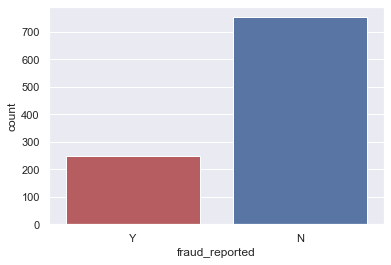

In [38]:
sns.set()

sns.countplot(x ="fraud_reported", data=df, palette=['r','b']);

# correlation among Variables 

In [39]:
#Color negative numbers red

def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = df[cont_var].corr()
corr.style.applymap(color)

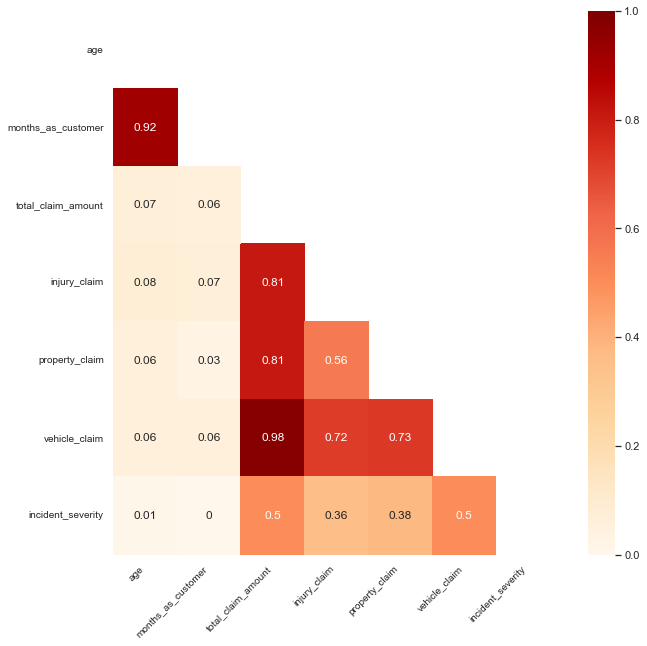

In [40]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount',
           'injury_claim', 'property_claim','vehicle_claim',
           'incident_severity','fraud_reported']

corr_df = df[corr_list]
corr=round(corr_df.corr(),2)

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


# visualization 

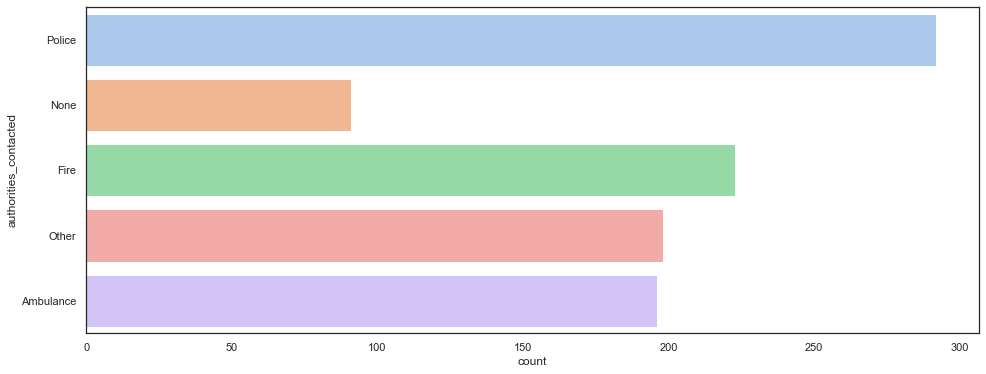

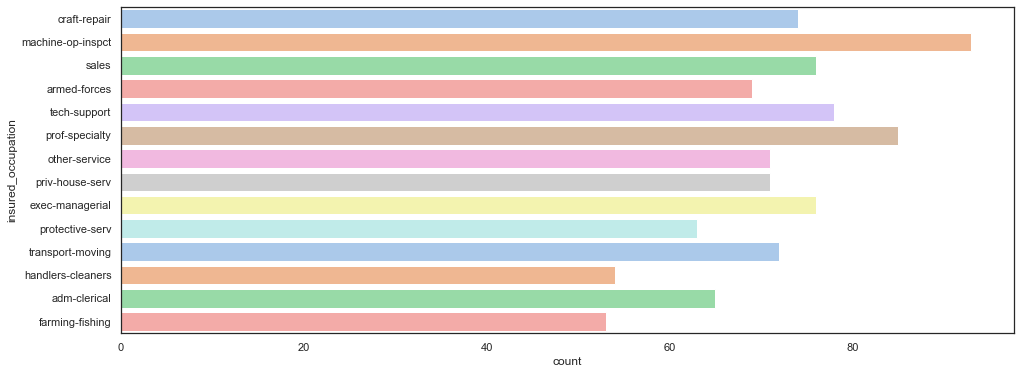

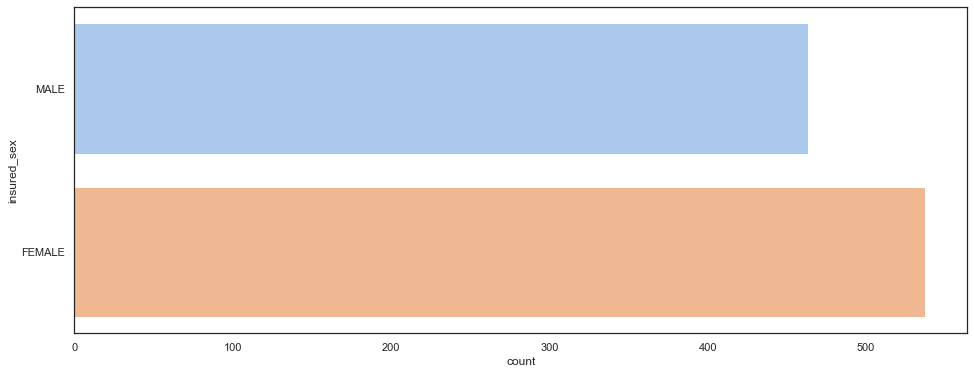

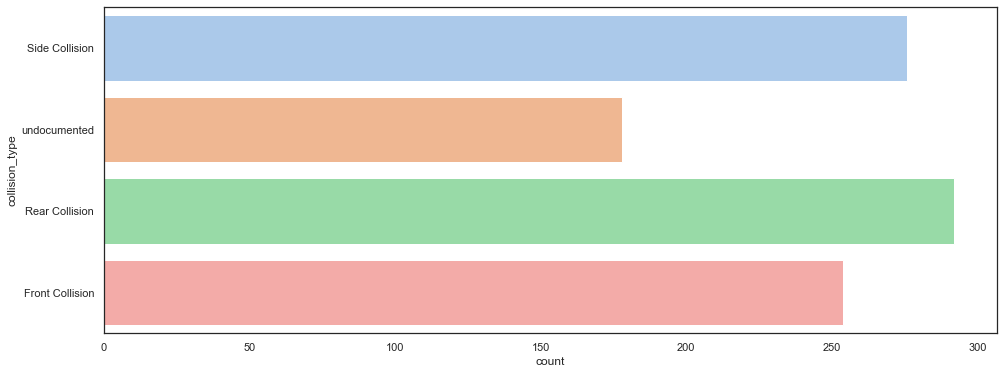

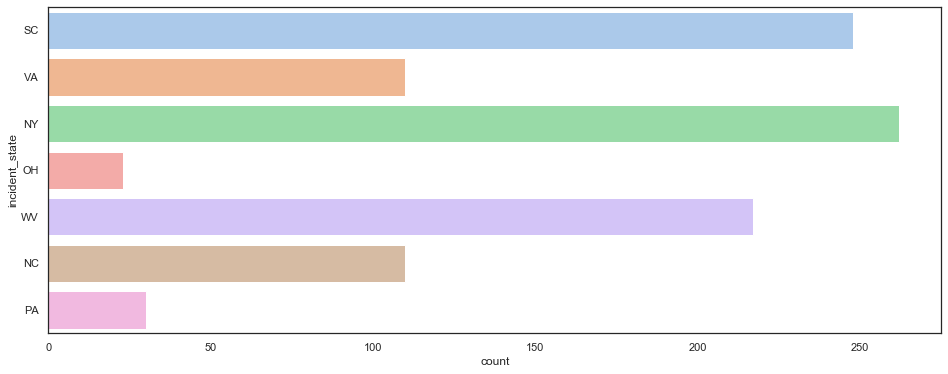

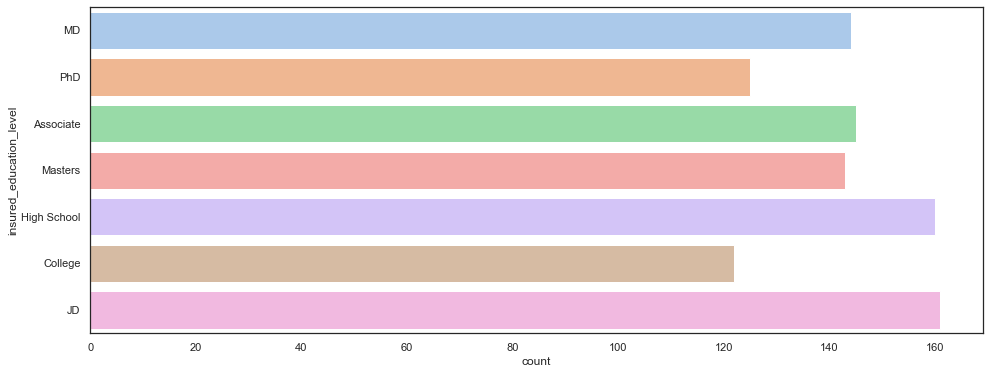

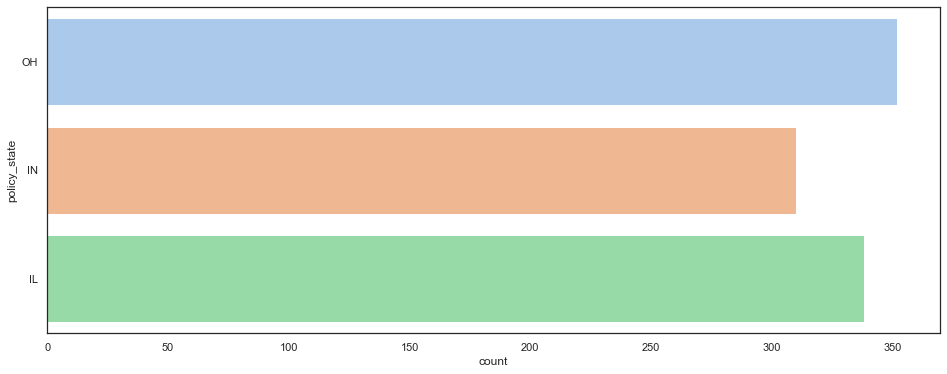

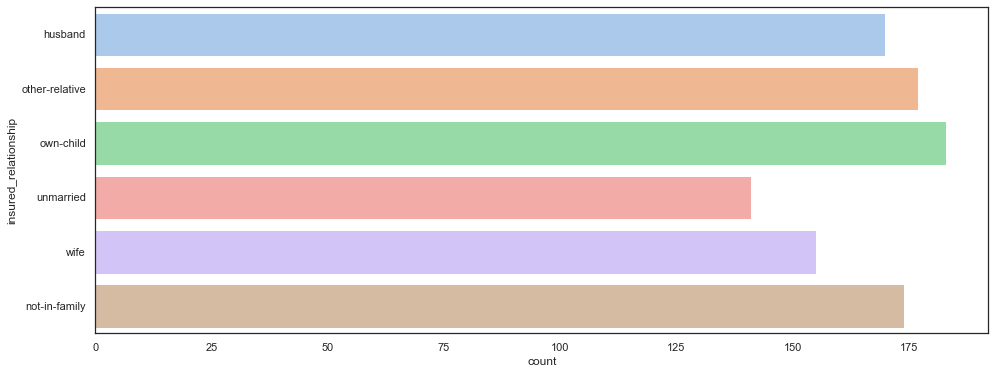

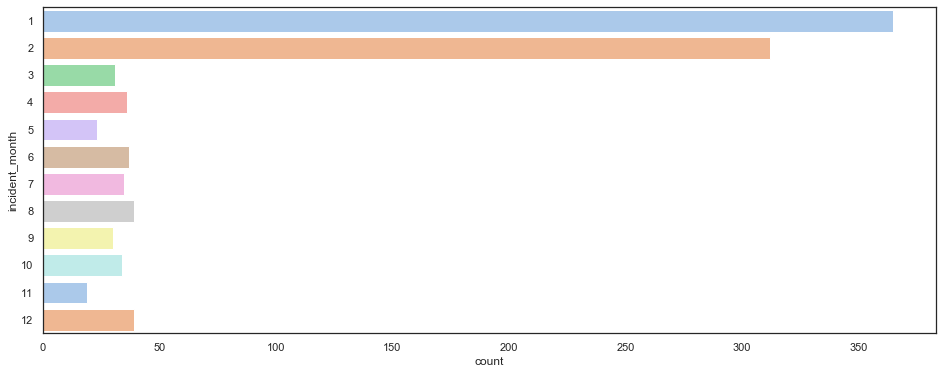

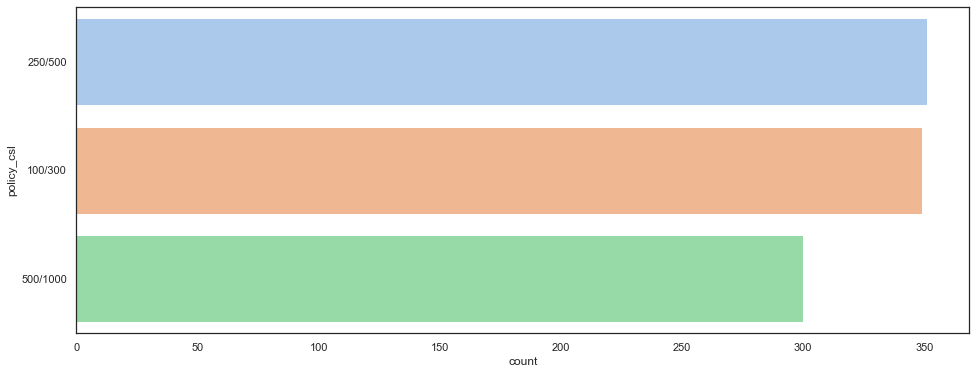

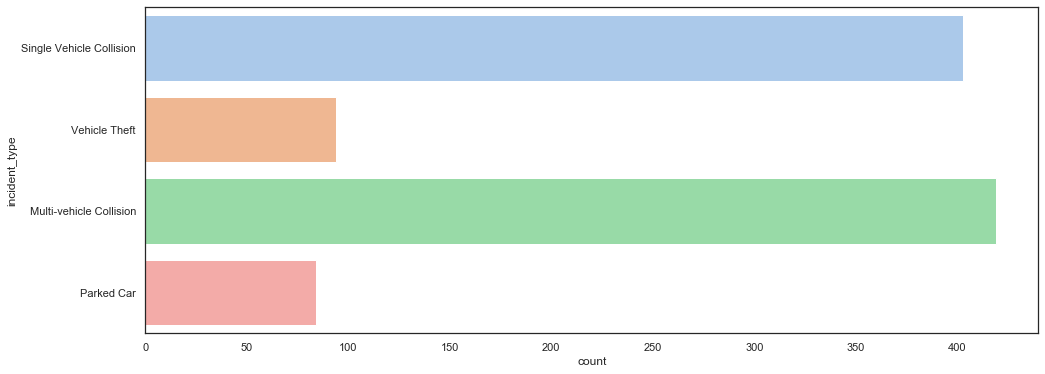

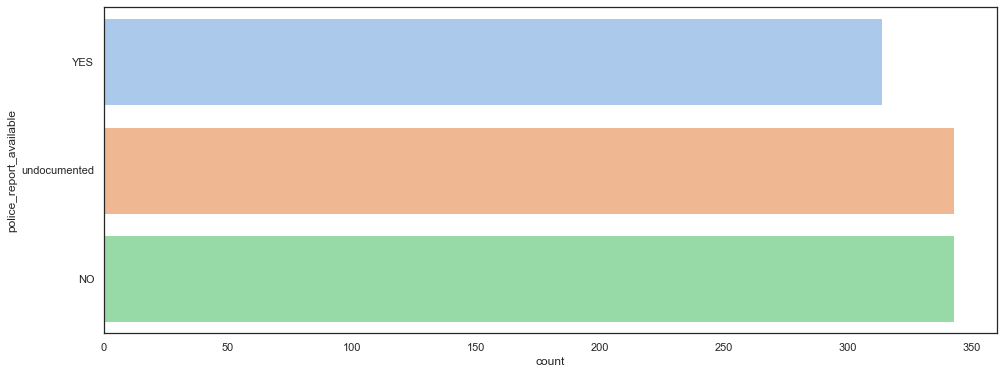

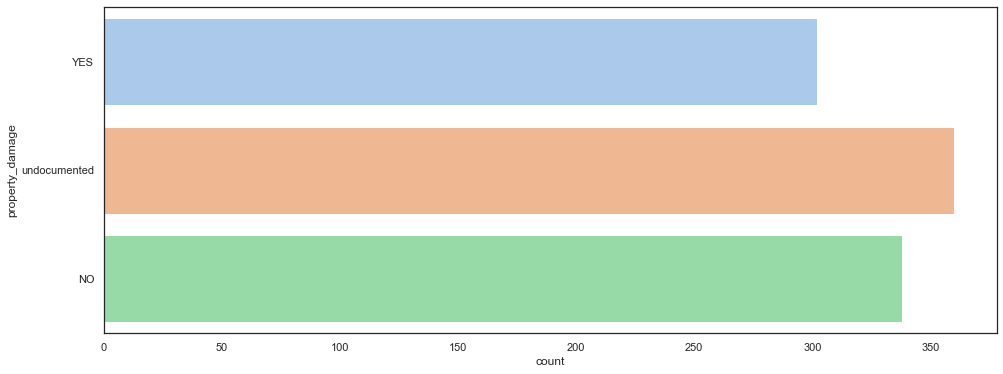

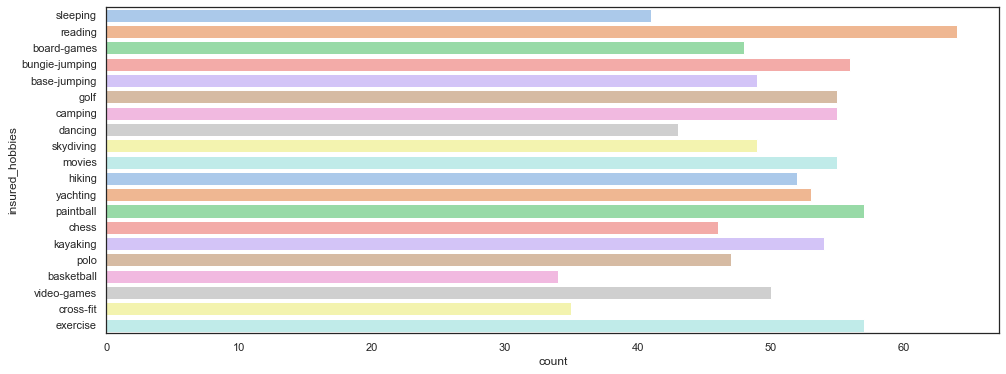

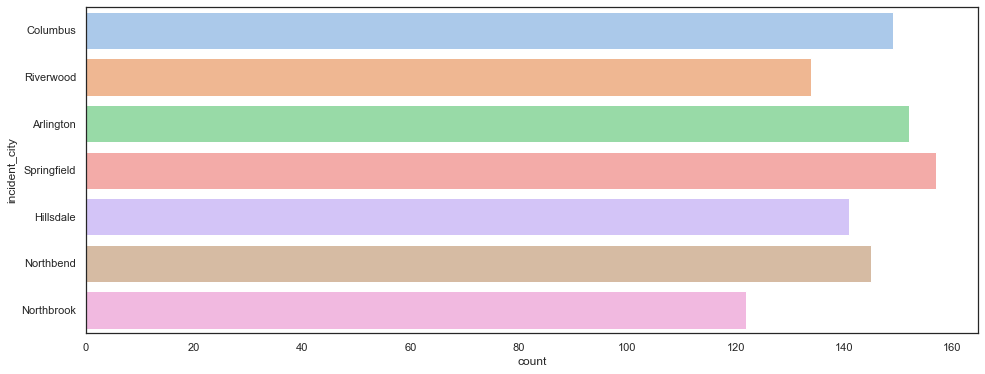

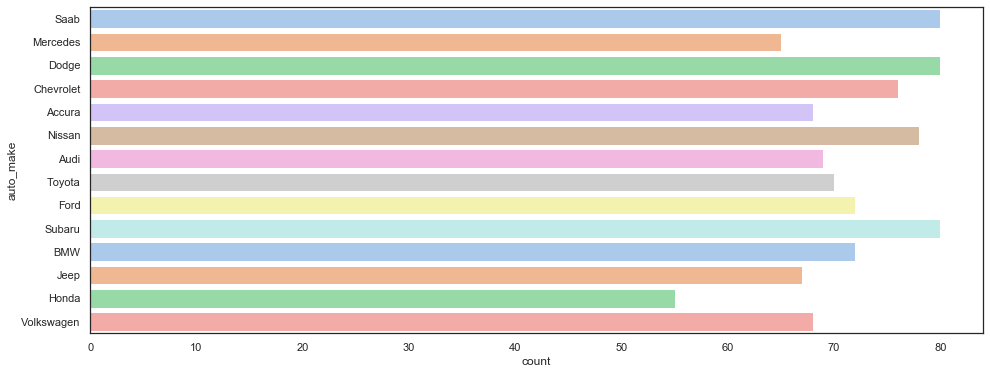

In [41]:
for i,name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(y=name,data=df,palette="pastel")

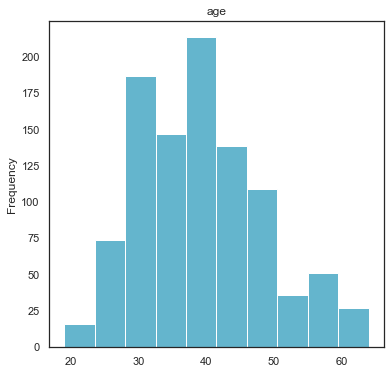

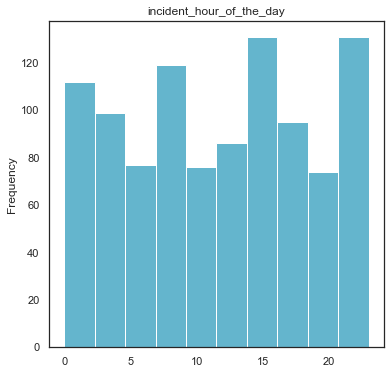

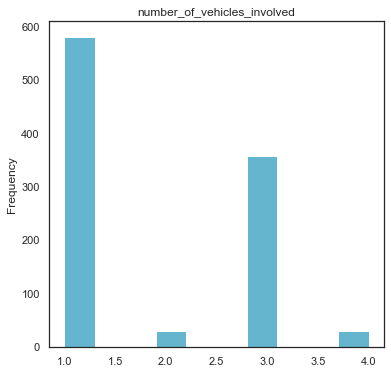

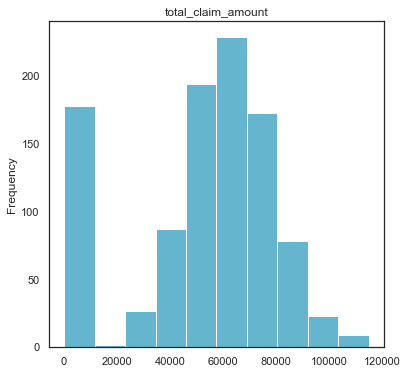

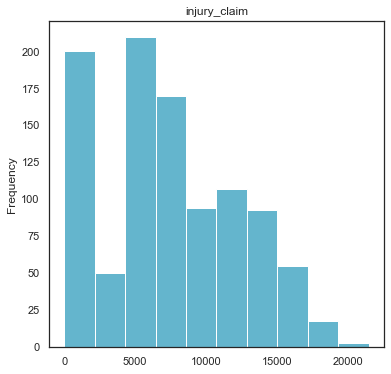

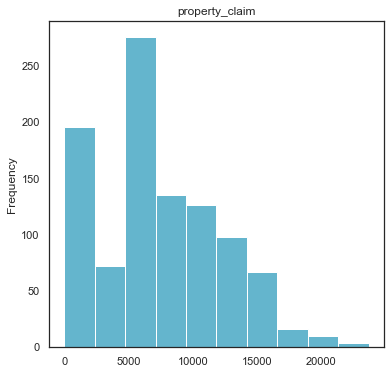

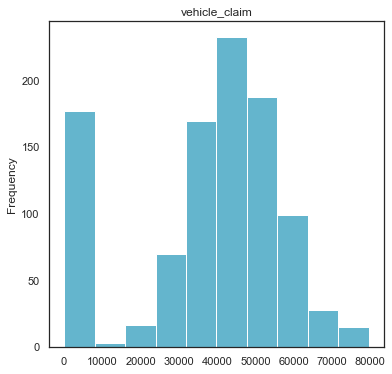

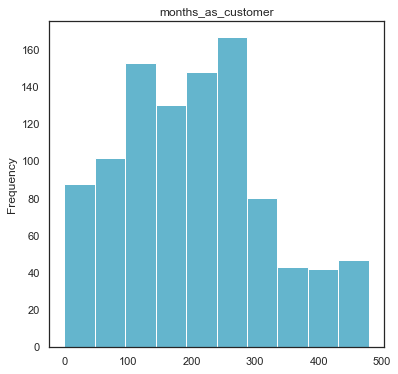

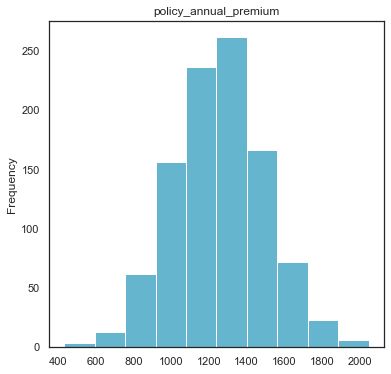

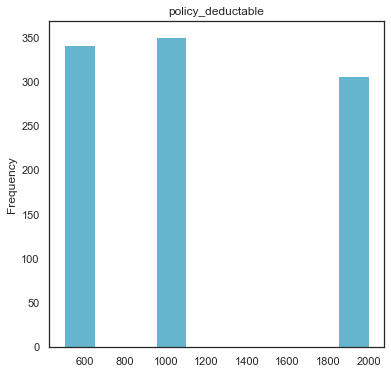

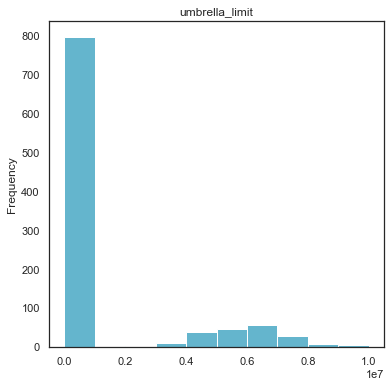

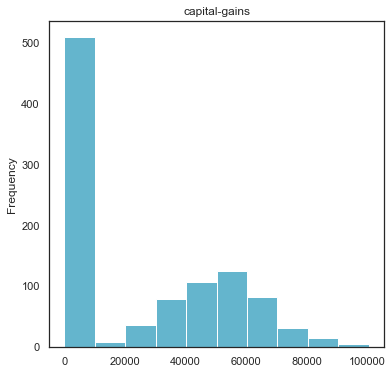

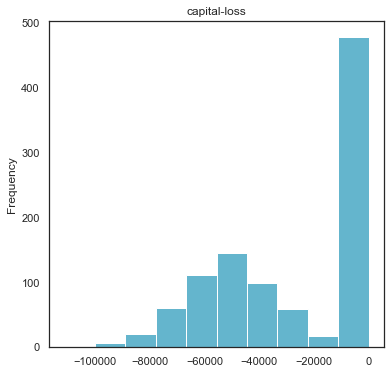

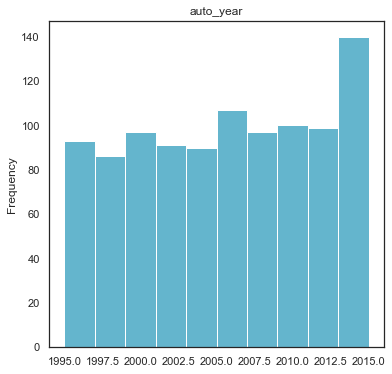

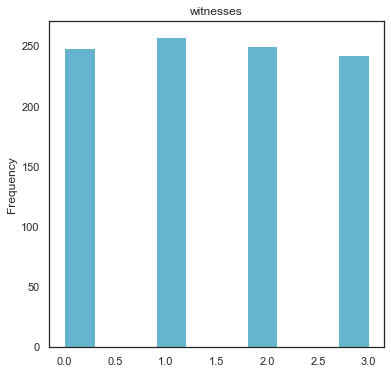

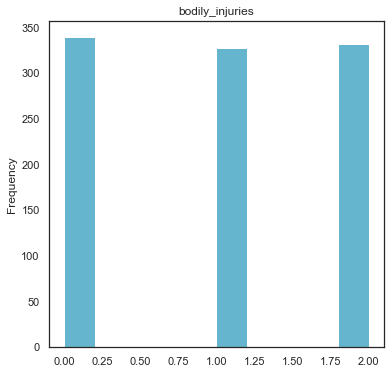

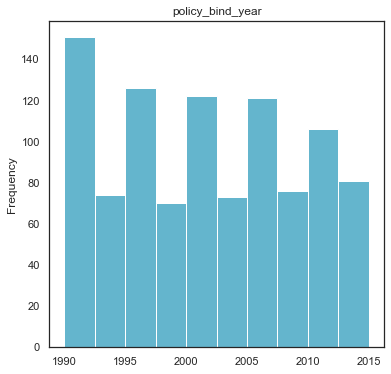

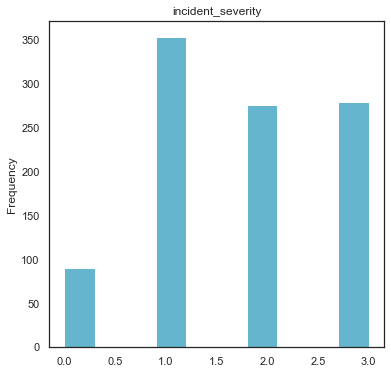

In [42]:

for i, name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(6,6))
    df[name].plot(kind="hist", color="c", title=name)

# visualizing variables agaiinst the DV

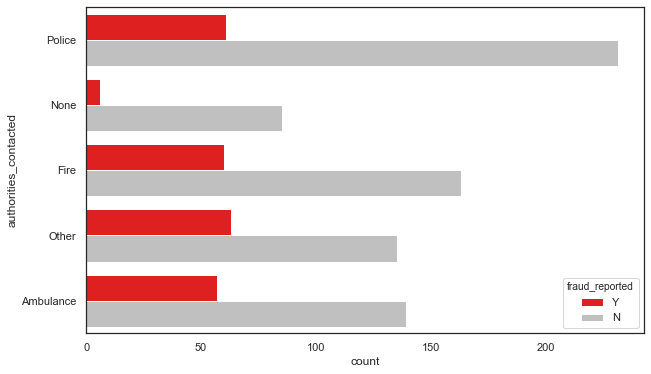

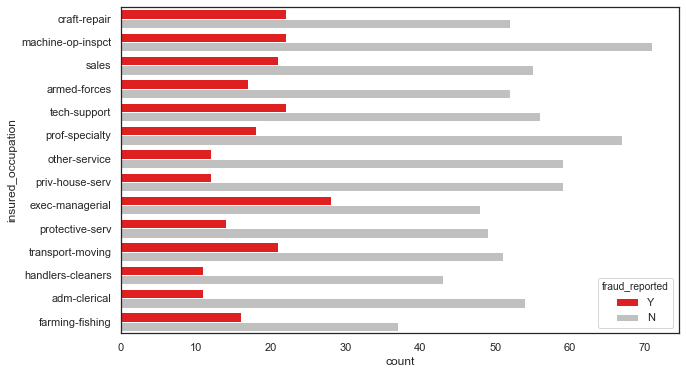

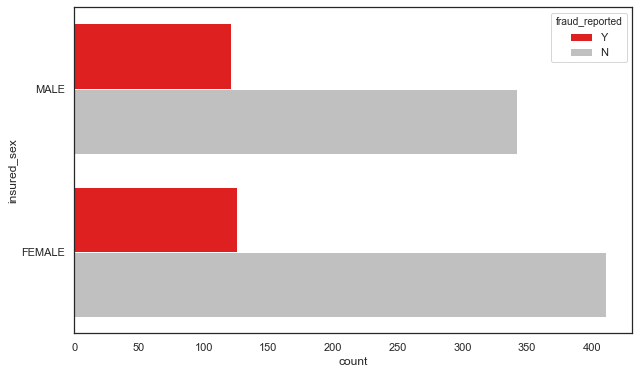

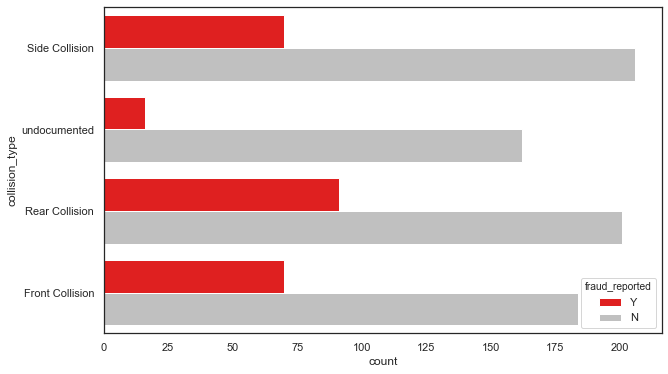

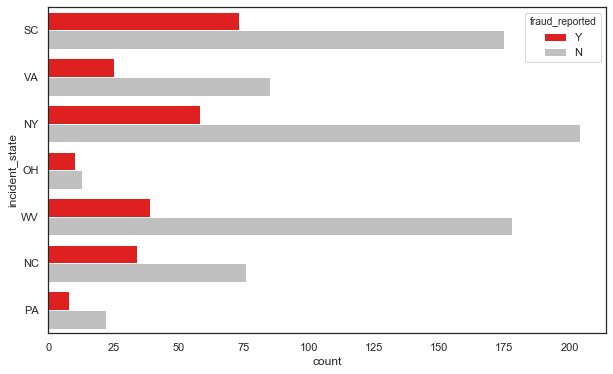

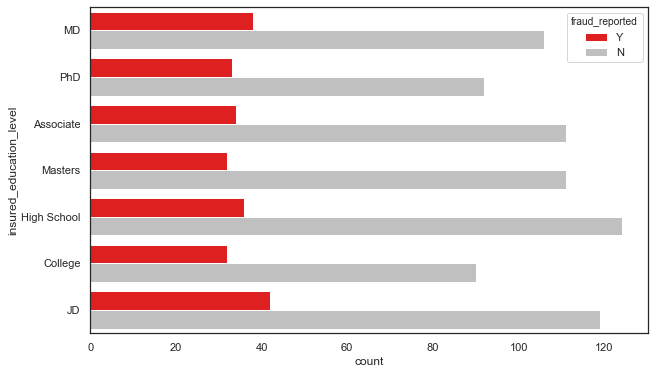

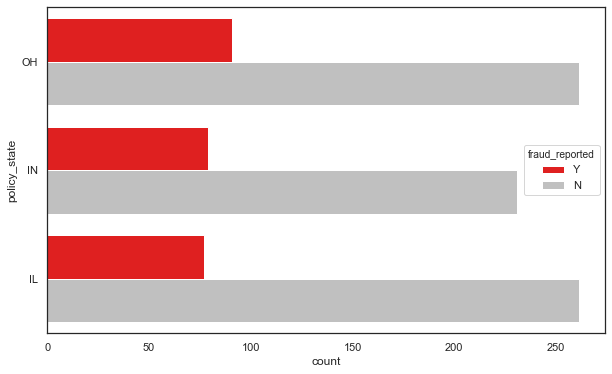

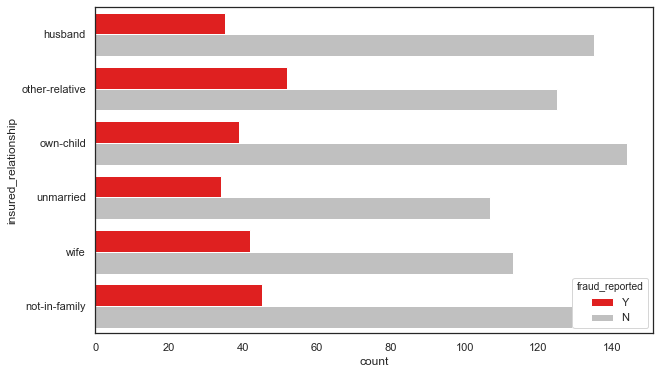

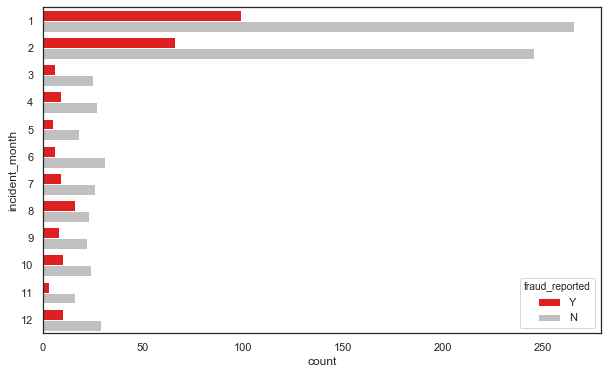

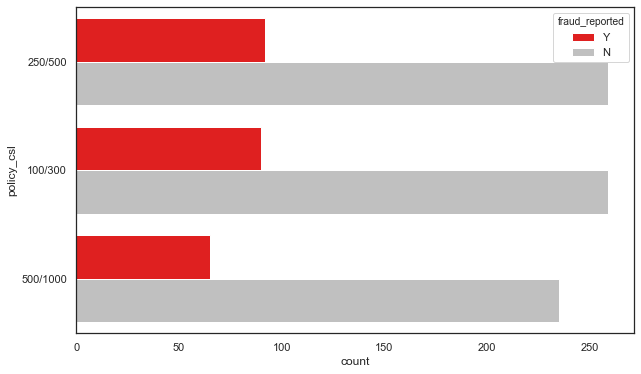

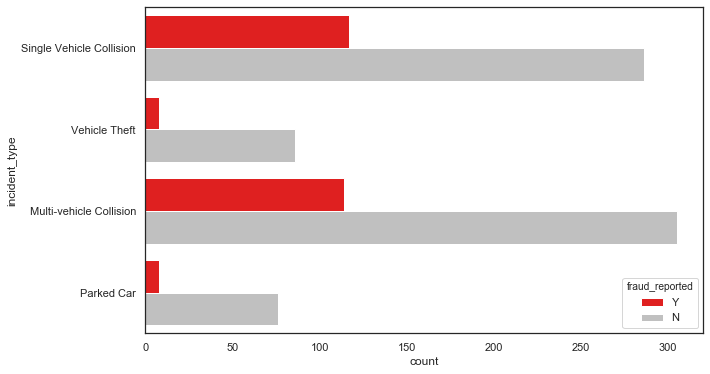

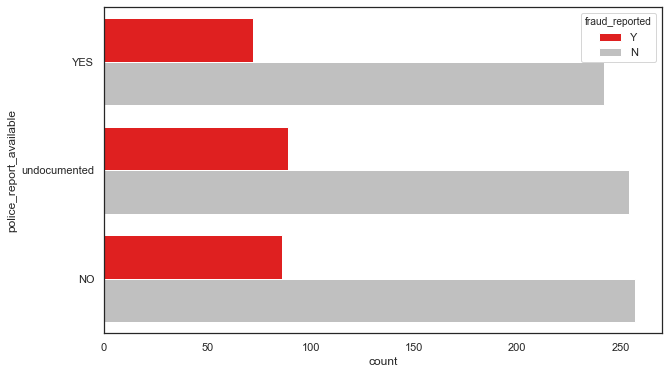

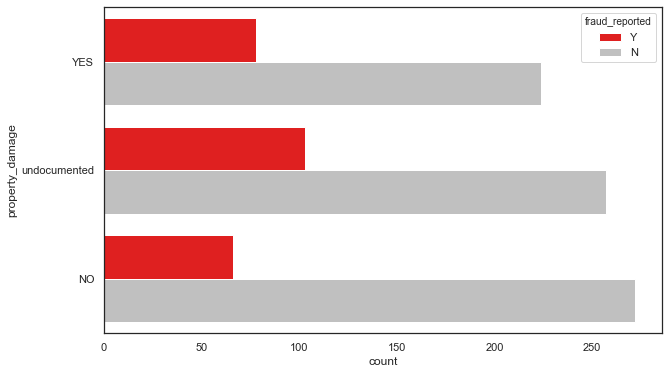

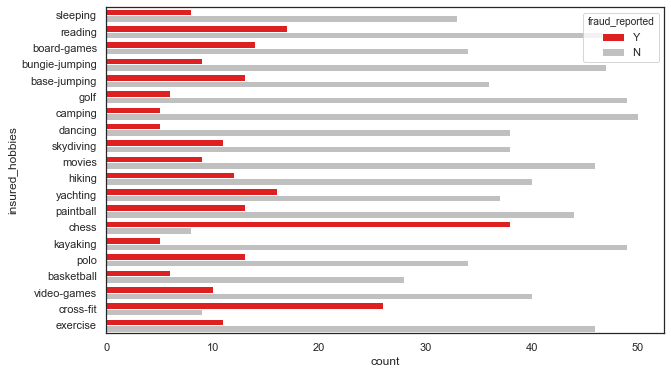

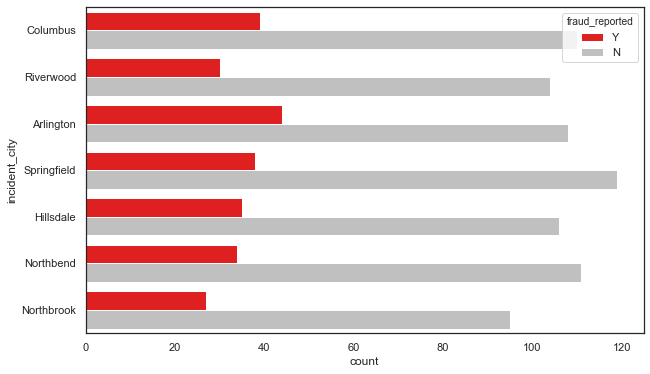

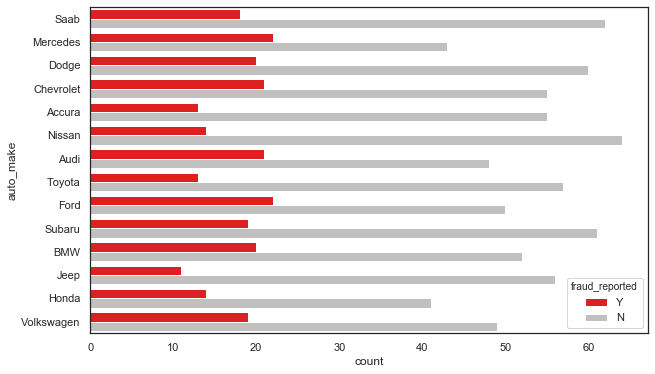

In [45]:
#each discrete var and fraud reported's dist

for i,name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(10,6))
    sns.countplot(y=name,data=df,hue="fraud_reported",palette=['red','silver'])

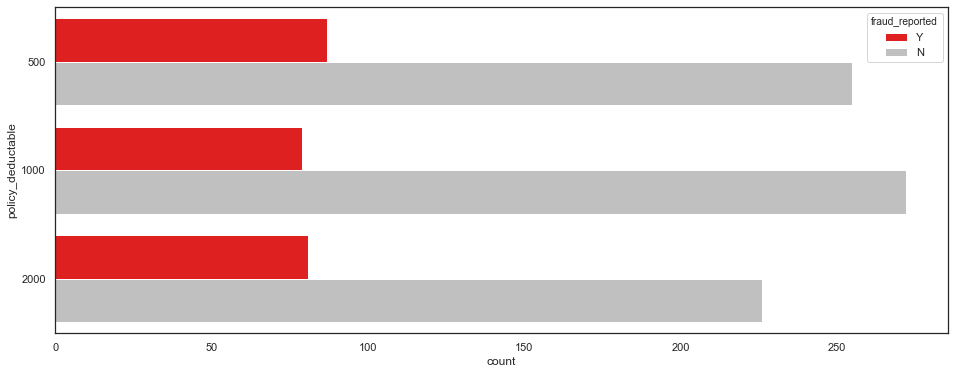

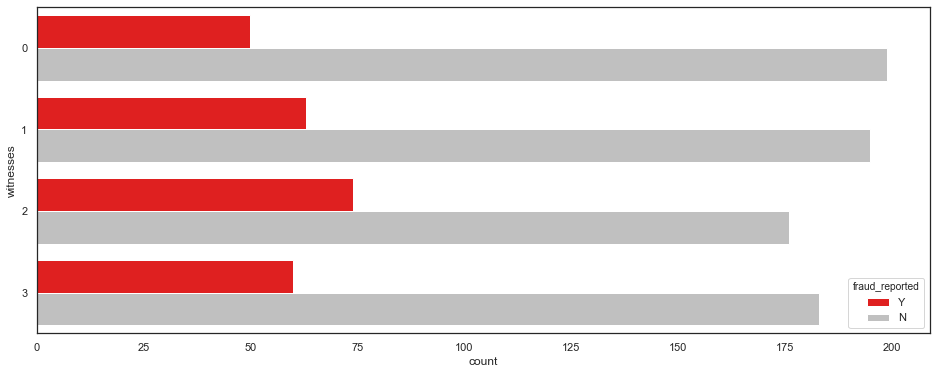

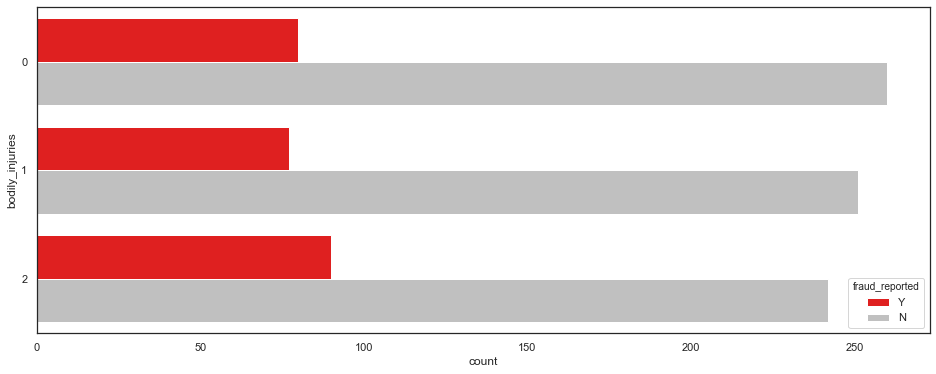

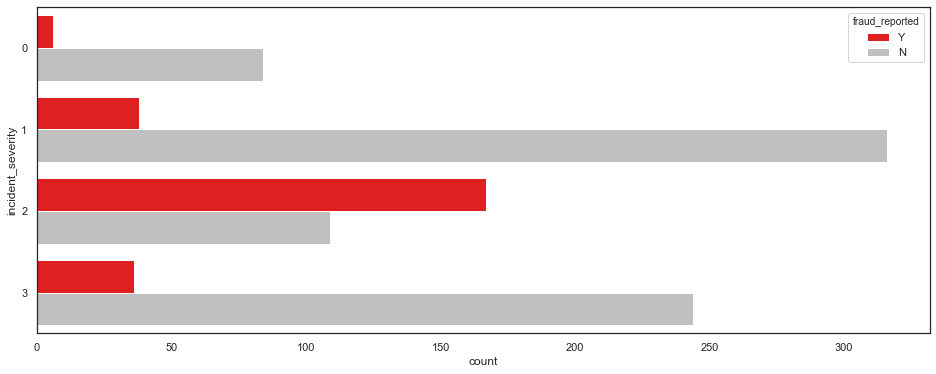

In [46]:

for i, name in enumerate(df[ord_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(data=df, y=name, hue='fraud_reported', palette=['red','silver'])


<Figure size 1152x432 with 0 Axes>

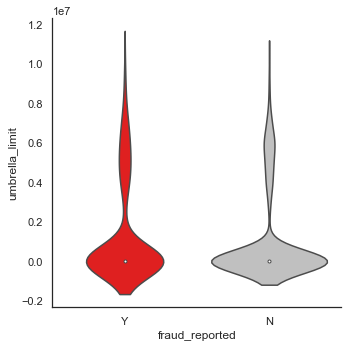

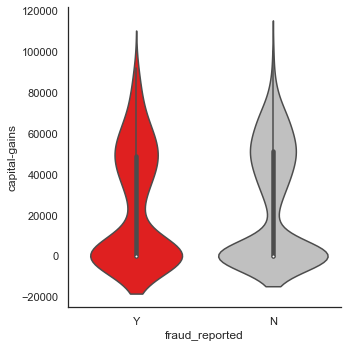

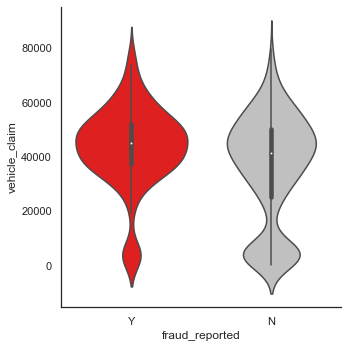

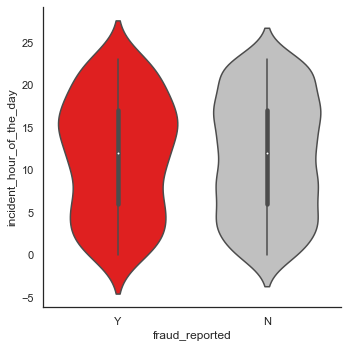

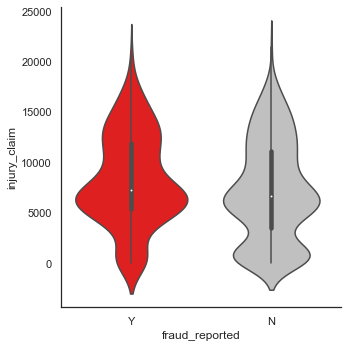

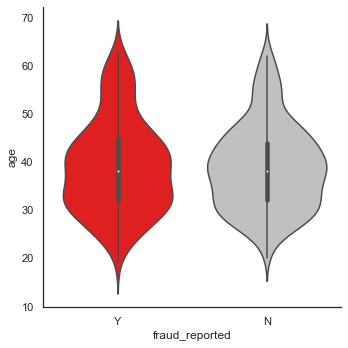

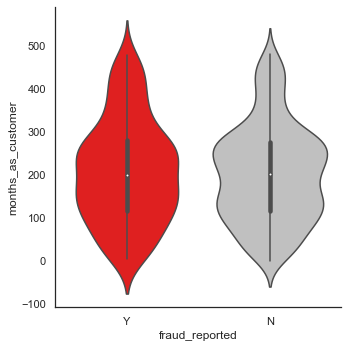

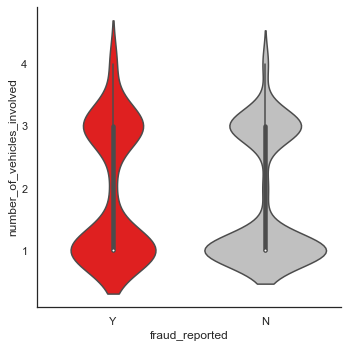

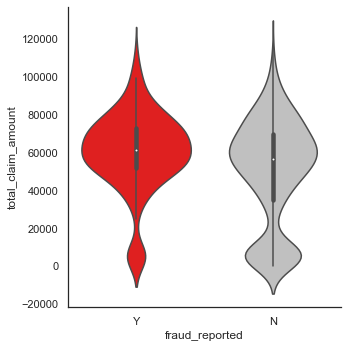

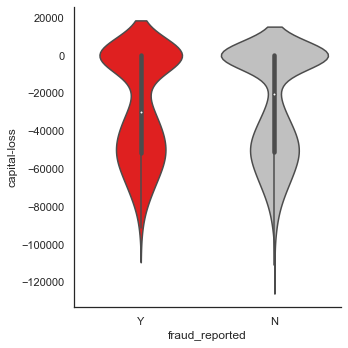

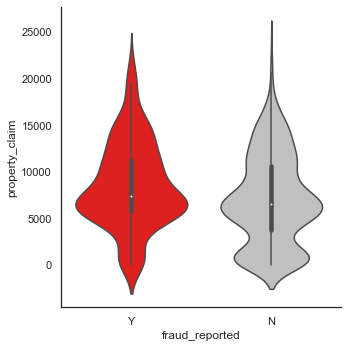

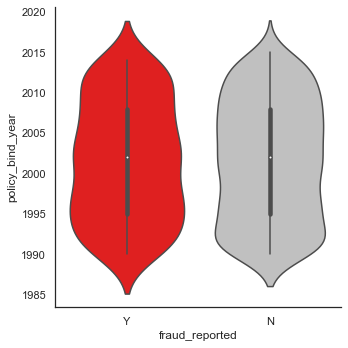

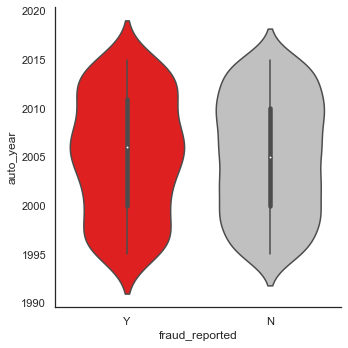

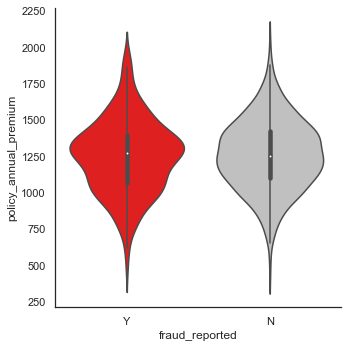

In [47]:
for i, name in enumerate(df[quan_var]):
    plt.figure(i,figsize=(16,6))
    sns.catplot(data=df, x="fraud_reported", y=name, kind='violin', palette=['red','silver'])

# Additional Visualization and Observations

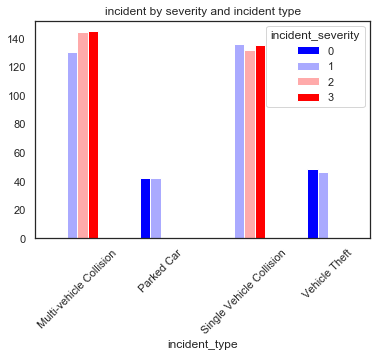

In [48]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

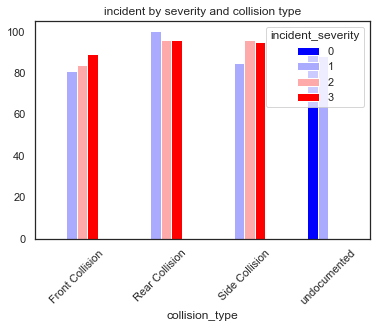

In [49]:
incident = pd.crosstab(df['collision_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");

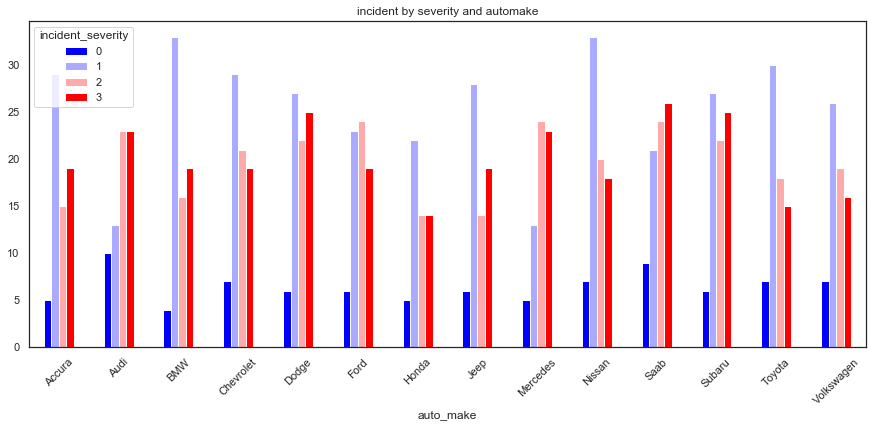

In [50]:
incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");

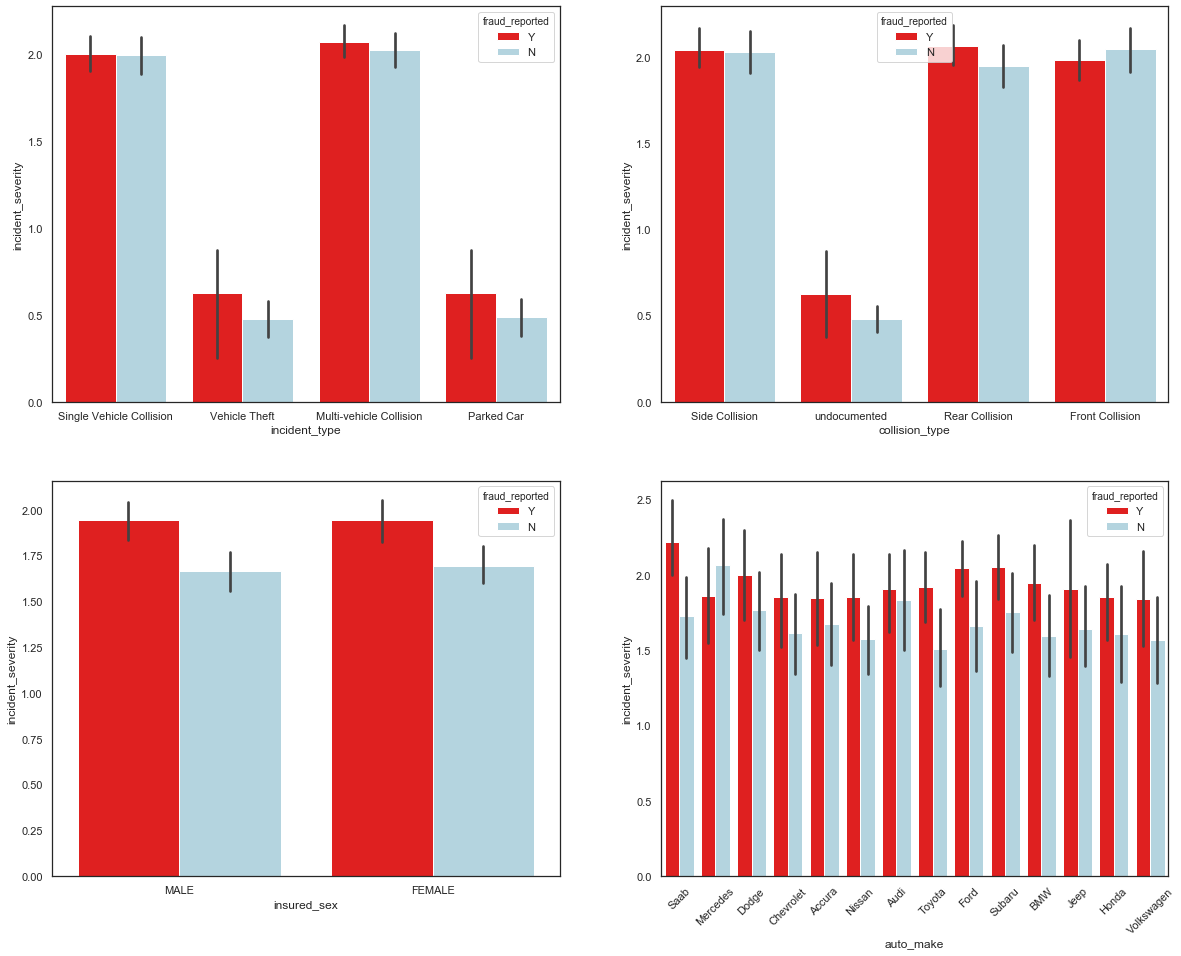

In [51]:
fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="collision_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="insured_sex", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="auto_make", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][1]);

plt.xticks(rotation=45);

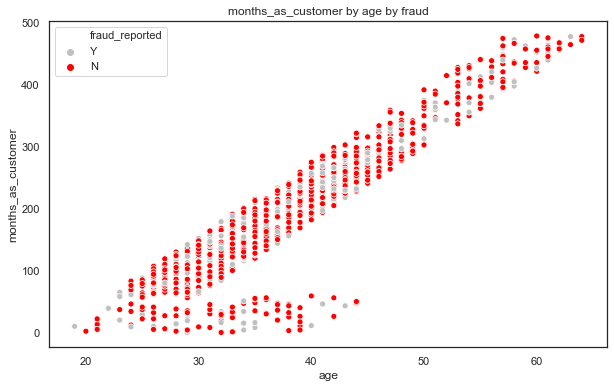

In [52]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("months_as_customer by age by fraud");

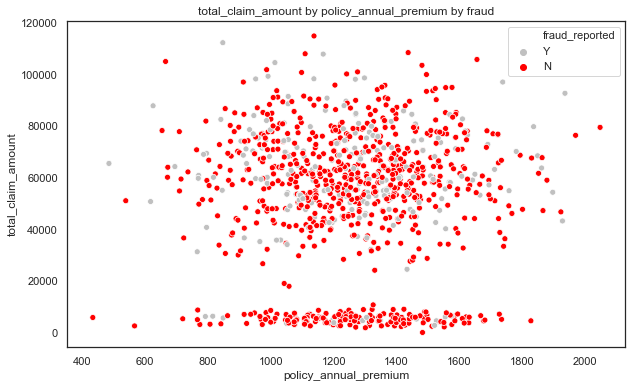

In [53]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("total_claim_amount by policy_annual_premium by fraud");

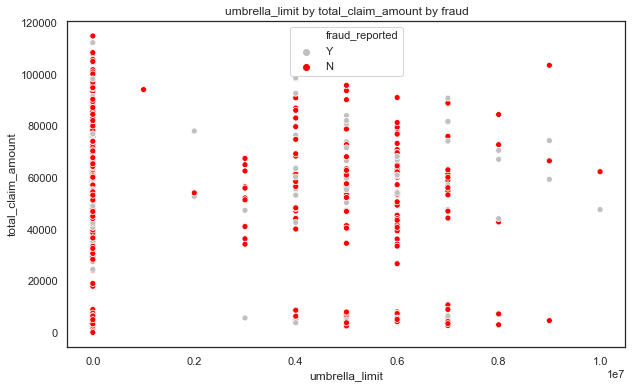

In [54]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("umbrella_limit by total_claim_amount by fraud");

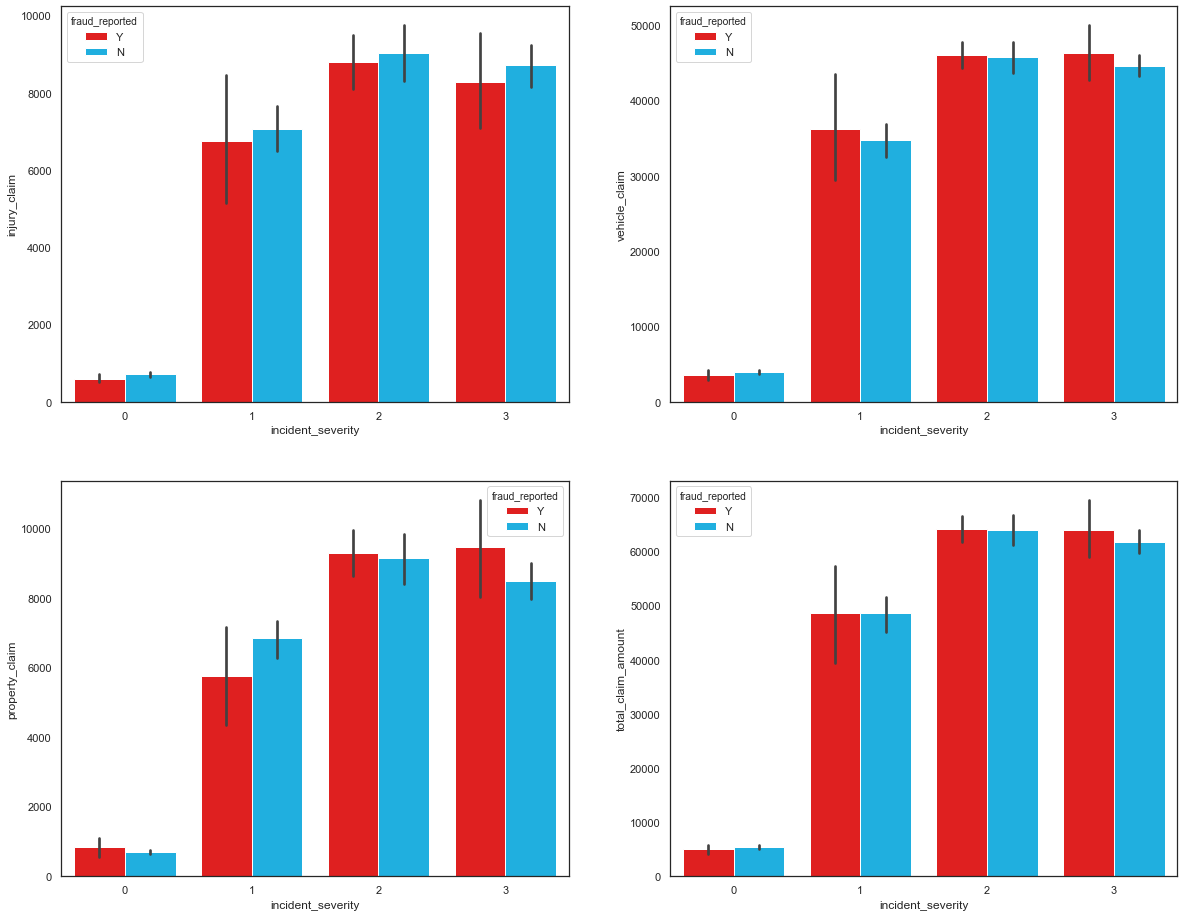

In [55]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][1]);


In [56]:
df['policy_bind_year']

0      2014
1      2006
2      2000
3      1990
4      2014
5      2006
6      2000
7      1990
8      1997
9      2011
10     2002
11     1999
12     1997
13     2012
14     1998
15     1992
16     2005
17     2004
18     2014
19     1992
20     2002
21     2005
22     1994
23     1991
24     1996
25     2013
26     1990
27     2002
28     1990
29     2014
30     2000
31     2008
32     2003
33     1992
34     1991
35     2010
36     2003
37     1993
38     2002
39     1997
40     1995
41     2012
42     2006
43     2003
44     2007
45     2006
46     1990
47     1990
48     2008
49     1997
50     2004
51     1994
52     2002
53     1994
54     2014
55     2007
56     2008
57     1995
58     1993
59     2005
60     1990
61     1993
62     2014
63     2008
64     2007
65     1993
66     2011
67     1990
68     1994
69     1994
70     2011
71     1998
72     1995
73     2002
74     2004
75     2001
76     2010
77     1992
78     2010
79     2013
80     1994
81     1997
82     2011
83  

# losses by claims

In [57]:
df['loss_by_claims']=df['total_claim_amount']-(df['policy_annual_premium']*(2015-df['policy_bind_year']))

In [58]:
df['loss_by_claims']

0       70203.09
1       -5704.98
2       13452.90
3       28006.50
4        4916.09
5       51940.10
6       58649.75
7       23164.25
8        1726.18
9       37037.28
10      70719.44
11      96725.44
12      34643.52
13       4470.17
14      24080.79
15      37097.80
16      40115.60
17      70084.96
18      71555.78
19      26458.21
20      31716.52
21      29088.50
22      51104.22
23      67709.04
24      61097.11
25      68966.16
26     -24032.50
27      -5304.91
28      37547.50
29      90545.50
30      61287.60
31      57779.04
32      16729.92
33      41269.33
34      30823.68
35      46429.25
36      48338.60
37     -21564.56
38      47277.85
39      37452.56
40      10967.60
41      91867.02
42      38376.63
43      44661.96
44      47751.36
45      42030.13
46      46098.25
47      30957.50
48       -577.09
49      54173.98
50      67207.18
51     -15290.43
52     -15596.76
53      45280.39
54       1246.43
55      68687.44
56      48852.57
57     -25894.80
58      33448.

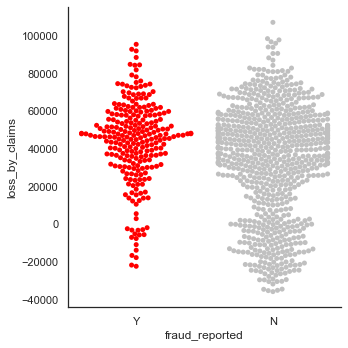

In [59]:
sns.set_style("white") 

sns.catplot(data=df, y="loss_by_claims",x="fraud_reported",hue='fraud_reported',kind='swarm',palette=['red','silver']);

In [60]:
df[['capital-loss','capital-gains','loss_by_claims']]

capital-loss  capital-gains  loss_by_claims
0               0          53300        70203.09
1               0              0        -5704.98
2               0          35100        13452.90
3          -62400          48900        28006.50
4          -46000          66000         4916.09
5               0              0        51940.10
6          -77000              0        58649.75
7               0              0        23164.25
8               0              0         1726.18
9          -39300              0        37037.28
10              0          38400        70719.44
11         -51000              0        96725.44
12              0              0        34643.52
13         -32800          52800         4470.17
14         -55500          41300        24080.79
15              0          55700        37097.80
16              0          63600        40115.60
17              0          53500        70084.96
18         -37800          45500        71555.78
19         -27300          57000        26458.21
20              0              0        31716.52
21              0          46700        29088.50
22         -68200          72700        51104.22
23         -31000              0        67709.04
24         -53500              0        61097.11
25              0              0        68966.16
26         -29200              0       -24032.50
27         -30200          31000        -5304.91
28         -55600              0        37547.50
29              0              0        90545.50
30              0          53200        61287.60
31              0          27500        57779.04
32              0          81100        16729.92
33         -64000          51400        41269.33
34              0              0        30823.68
35         -49200          53300        46429.25
36              0              0        48338.60
37              0              0       -21564.56
38              0          65700        47277.85
39              0          48500        37452.56
40         -55700              0        10967.60
41         -24100              0        91867.02
42         -67400              0        38376.63
43         -60200          49700        44661.96
44         -28700          36400        47751.36
45              0              0        42030.13
46              0          35300        46098.25
47              0              0        30957.50
48              0              0         -577.09
49         -40300              0        54173.98
50              0              0        67207.18
51              0              0       -15290.43
52              0              0       -15596.76
53         -46500          88400        45280.39
54         -39600          47600         1246.43
55              0          71500        68687.44
56         -55000          36100        48852.57
57              0              0       -25894.80
58         -45800          56600        33448.68
59         -58500          94800        54213.70
60              0          36900        49599.25
61              0          69100        18579.60
62         -49500              0        55306.49
63         -49000              0        55578.33
64              0          62400        45996.16
65              0          35700        52336.86
66         -91200          43400        84743.12
67              0          59600        13054.50
68         -66200          43300        46242.07
69         -51500              0       -22560.68
70         -50000          56200        63888.04
71         -50300          37800        43345.99
72              0              0        12183.40
73         -42900              0        35891.91
74              0              0        27464.11
75              0          78300        31252.44
76         -19700              0        84209.55
77              0              0        29666.47
78         -45000              0          613.80
79              0              0        70246.66
80         -40600          52700    

In [61]:
df.groupby('fraud_reported')['loss_by_claims'].sum()

fraud_reported
N    25126613.43
Y    10806751.60
Name: loss_by_claims, dtype: float64

In [62]:
df.groupby('fraud_reported')['loss_by_claims'].mean()

fraud_reported
N    33368.676534
Y    43752.030769
Name: loss_by_claims, dtype: float64

In [63]:
43752.030769-33368.676534

10383.354234999999

In [64]:
df.groupby('fraud_reported')['loss_by_claims'].std()

fraud_reported
N    29690.411374
Y    21812.675584
Name: loss_by_claims, dtype: float64

In [65]:
df[['fraud_reported', 'loss_by_claims']].isnull().sum()

fraud_reported    0
loss_by_claims    0
dtype: int64

In [66]:
df_ttest = df[['fraud_reported', 'loss_by_claims']]
df_ttest.head()

fraud_reported  loss_by_claims
0              Y        70203.09
1              Y        -5704.98
2              N        13452.90
3              Y        28006.50
4              N         4916.09

In [67]:
stats.ttest_ind(df_ttest.loc[df_ttest['fraud_reported']=='Y', 'loss_by_claims'], df_ttest.loc[df_ttest['fraud_reported']=='N', 'loss_by_claims'])

Ttest_indResult(statistic=5.065425715463792, pvalue=4.852489023999467e-07)

In [68]:
#DV numerical code
df['fraud_reported'] = df['fraud_reported'].map({"Y":1, "N":0})
df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     1
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
110    0
1

In [69]:
df['insured_sex'] = df['insured_sex'].map({"FEMALE":0,"MALE":1})

In [70]:
df['capital-loss']=df['capital-loss']*(-1)

In [71]:
df['capital-loss'].max()

111100

In [72]:
#check that they are coded

df['pclaim_severity_int'] = df['property_claim']*df['incident_severity']
df['vclaim_severity_int'] = df['vehicle_claim']*df['incident_severity']
df['iclaim_severity_int'] = df['injury_claim']*df['incident_severity']
df['tclaim_severity_int'] = df['total_claim_amount']*df['incident_severity']

df['prem_claim_int'] = df['policy_annual_premium']*df['total_claim_amount']
df['umlimit_tclaim_int'] = df['umbrella_limit']*df['total_claim_amount']

## Dummy coding

In [73]:
rem = ['insured_sex','incident_month']
dum_list = [e for e in nom_var if e not in rem]
len(dum_list)

14

In [74]:
dum = pd.get_dummies(df[dum_list], drop_first=True)
dum.head()

authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   
1                                     0                                     1   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   insured_occupation_sales  insured_occupation_tech-support  \
0                         0                                0   
1                         0                                0   
2                         1                                0   
3                         0                                0   
4                         1                                0   

   insured_occupation_transport-moving  collision_type_Rear Collision  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              1   
3                                    0                              0   
4                                    0                              0   

   collision_type_Side Collision  collision_type_undocumented  \
0                              1                            0   
1           

In [75]:
dum.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_dummied = pd.concat([dum, df], axis=1)

In [76]:
df_dummied.drop(nom_var, axis=1, inplace=True)

In [77]:
df_dummied.head()

authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   
1                                     0                                     1   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   insured_occupation_sales  insured_occupation_tech-support  \
0                         0                                0   
1                         0                                0   
2                         1                                0   
3                         0                                0   
4                         1                                0   

   insured_occupation_transport-moving  collision_type_Rear Collision  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              1   
3                                    0                              0   
4                                    0                              0   

   collision_type_Side Collision  collision_type_undocumented  \
0                              1                            0   
1           

In [78]:
df_dummied.isnull().sum().any()

False

In [79]:
df_dummied['umbrella_limit'].sort_values(ascending=True)


0             0
622           0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
621           0
635           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
636           0
650           0
620           0
617           0
588           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
618           0
602           0
605           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
604           0
587           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [81]:
dd = df_dummied.describe()
dd.loc['min']

authorities_contacted_Fire                     0.00
authorities_contacted_None                     0.00
authorities_contacted_Other                    0.00
authorities_contacted_Police                   0.00
insured_occupation_armed-forces                0.00
insured_occupation_craft-repair                0.00
insured_occupation_exec-managerial             0.00
insured_occupation_farming-fishing             0.00
insured_occupation_handlers-cleaners           0.00
insured_occupation_machine-op-inspct           0.00
insured_occupation_other-service               0.00
insured_occupation_priv-house-serv             0.00
insured_occupation_prof-specialty              0.00
insured_occupation_protective-serv             0.00
insured_occupation_sales                       0.00
insured_occupation_tech-support                0.00
insured_occupation_transport-moving            0.00
collision_type_Rear Collision                  0.00
collision_type_Side Collision                  0.00
collision_ty

In [82]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

# #Train test split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

# Baseline Accuracy Score

In [84]:
#baseline accuracy = 75.2%

y_test.value_counts(normalize=True)

0    0.752
1    0.248
Name: fraud_reported, dtype: float64

In [85]:
y_test.value_counts()

0    188
1     62
Name: fraud_reported, dtype: int64

In [86]:
base_recall = 62/(62)
base_speci = 0/(188)
base_preci = 62/(250)
base_f1 = 2*base_recall*base_preci/(base_recall+base_preci)


df_prob = pd.DataFrame()
df_prob['y']=y_test
df_prob['pred']=1
auc_score = roc_auc_score(df_prob['y'], df_prob['pred'])


print("If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:")
print("")
print("Sensitivity:", base_recall)
print('Specificity:', base_speci)
print('Precision:', base_preci)
print('F1 score:', base_f1)
print('ROC AUC Score:', auc_score)

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.3974358974358974
ROC AUC Score: 0.5


In [87]:
def scores(t, name):
    print (name, 'classification metric')
    print("CV scores:", round(t.best_score_,3))
    print("train score:", round(t.score(x_train, y_train),3))
    print("test score:", round(t.score(x_test, y_test),3))

    #Evaluation metrics
    predictions = t.predict(x_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    speci= TN/(TN + FP)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    print(f'Sensitivity: {round(sensi,3)}')
    print(f'Specificity: {round(speci,3)}')
    print(f'Precision: {round(preci,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))

# Modeling

In [88]:
y_train.value_counts(normalize=True)

0    0.753333
1    0.246667
Name: fraud_reported, dtype: float64

# #Logistic Regression

In [89]:
lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            'class_weight':[{0:0.246667, 1:0.75333},None]}

    
rs_lr = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr.fit(x_train, y_train, )
print(rs_lr.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 910.2981779915227}


C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# KNN 

In [90]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn.fit(x_train, y_train)
print(rs_knn.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 7, 'knn__metric': 'euclidean', 'knn__leaf_size': 7, 'knn__algorithm': 'brute'}


# #Random Forest

In [91]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


In [92]:
y_train.value_counts()

0    565
1    185
Name: fraud_reported, dtype: int64

In [93]:
#scaled positive weight
565/185

3.054054054054054

# #XG Boost

In [94]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, 3.054054054054054],
              }


    
rs_xg = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg.fit(x_train, y_train)
print(rs_xg.best_params_)

{'scale_pos_weight': 3.054054054054054, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'n_estimators': 550, 'max_depth': 6, 'gamma': 3, 'eta': 0.05}


# #Adaboost

In [95]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


# Evaluation

In [96]:
classifiers={'logreg':rs_lr, 'knn':rs_knn, 'Ranfor':rs_rf, 
             'XGB':rs_xg, 'AdaBoost':rs_ab}

for key, value in classifiers.items(): 
    print(scores(value,key))
    print("__________________________")
    print(" ")

logreg classification metric
CV scores: 0.769
train score: 0.841
test score: 0.7
Sensitivity: 0.339
Specificity: 0.819
Precision: 0.382
F1: 0.359
ROC AUC Score: 0.643
None
__________________________
 
knn classification metric
CV scores: 0.772
train score: 1.0
test score: 0.74
Sensitivity: 0.161
Specificity: 0.931
Precision: 0.435
F1: 0.235
ROC AUC Score: 0.666
None
__________________________
 
Ranfor classification metric
CV scores: 0.796
train score: 0.981
test score: 0.792
Sensitivity: 0.516
Specificity: 0.883
Precision: 0.593
F1: 0.552
ROC AUC Score: 0.82
None
__________________________
 
XGB classification metric
CV scores: 0.841
train score: 0.981
test score: 0.84
Sensitivity: 0.758
Specificity: 0.867
Precision: 0.653
F1: 0.701
ROC AUC Score: 0.834
None
__________________________
 
AdaBoost classification metric
CV scores: 0.811
train score: 0.896
test score: 0.776
Sensitivity: 0.419
Specificity: 0.894
Precision: 0.565
F1: 0.481
ROC AUC Score: 0.829
None
_________________________

# #Modeling with oversampling using SMOTE

In [97]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

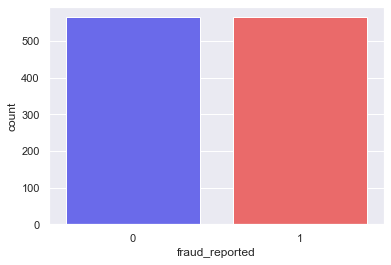

In [103]:
#dist of dv
sns.set()
sns.countplot(x=y_train, palette='seismic');

1    565
0    565
Name: fraud_reported, dtype: int64


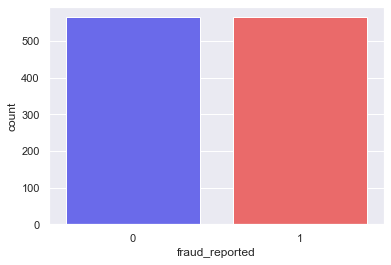

In [102]:
#SMOTE data for train set

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
print(y_train.value_counts())

sns.countplot(x=y_train, palette='seismic');

# #Logistic Regression

In [101]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr2 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr2.fit(x_train, y_train)
print(rs_lr2.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# #KNN

In [104]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn2 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn2.fit(x_train, y_train)
print(rs_knn2.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


# #Random Forest

In [106]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf2 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf2.fit(x_train, y_train)
print(rs_rf2.best_params_)

{'n_estimators': 550, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 50}


# #XGBoost

In [105]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg2 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg2.fit(x_train, y_train)
print(rs_xg2.best_params_)

{'reg_lambda': 0.05, 'reg_alpha': 0.01, 'n_estimators': 250, 'max_depth': 5, 'gamma': 1, 'eta': 0.1}


# #Adaboost

In [107]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab2 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab2.fit(x_train, y_train)
print(rs_ab2.best_params_)

{'n_estimators': 150, 'learning_rate': 0.3}


In [108]:
classifiers2={'logreg2':rs_lr2, 'knn2':rs_knn2, 'Ranfor2':rs_rf2, 
             'XGB2':rs_xg2, 'AdaBoost2':rs_ab2} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.826
train score: 0.884
test score: 0.704
Sensitivity: 0.403
Specificity: 0.803
Precision: 0.403
F1: 0.403
ROC AUC Score: 0.635
None
________________
 
knn2 classification metric
CV scores: 0.525
train score: 1.0
test score: 0.292
Sensitivity: 0.952
Specificity: 0.074
Precision: 0.253
F1: 0.4
ROC AUC Score: 0.559
None
________________
 
Ranfor2 classification metric
CV scores: 0.852
train score: 0.993
test score: 0.796
Sensitivity: 0.516
Specificity: 0.888
Precision: 0.604
F1: 0.557
ROC AUC Score: 0.804
None
________________
 
XGB2 classification metric
CV scores: 0.875
train score: 1.0
test score: 0.816
Sensitivity: 0.597
Specificity: 0.888
Precision: 0.638
F1: 0.617
ROC AUC Score: 0.828
None
________________
 
AdaBoost2 classification metric
CV scores: 0.858
train score: 0.912
test score: 0.812
Sensitivity: 0.581
Specificity: 0.888
Precision: 0.632
F1: 0.605
ROC AUC Score: 0.808
None
________________
 


In [109]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

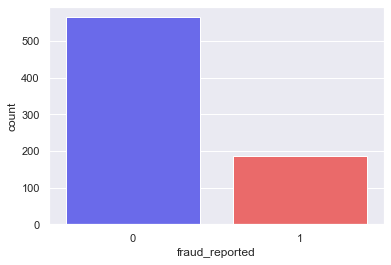

In [110]:
#dist of dv
sns.countplot(x=y_train, palette='seismic');

# #Modeling with Oversampling using ADASYN

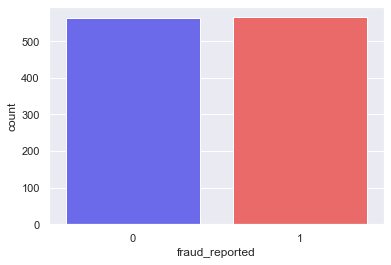

In [111]:
#adasyn data for train set

oversample = ADASYN()
x_train, y_train = oversample.fit_resample(x_train, y_train)
sns.countplot(x=y_train, palette='seismic');

# #Logistic Regression

In [112]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr4 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr4.fit(x_train, y_train)
print(rs_lr4.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# #KNN

In [113]:
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn4 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn4.fit(x_train, y_train)
print(rs_knn4.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


## Random Forest

In [114]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
              }


rs_rf4 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf4.fit(x_train, y_train)
print(rs_rf4.best_params_)

{'n_estimators': 550, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 50}


# XGBoost 

In [115]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg4 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg4.fit(x_train, y_train)
print(rs_xg4.best_params_)

{'reg_lambda': 0.05, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 5, 'gamma': 0, 'eta': 0.05}


# #Adaboost

In [117]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab4 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab4.fit(x_train, y_train)
print(rs_ab4.best_params_)

{'n_estimators': 400, 'learning_rate': 0.1}


In [118]:
classifiers4={'logreg4':rs_lr4, 'knn4':rs_knn4, 'Ranfor4':rs_rf4, 
             'XGB4':rs_xg4, 'AdaBoost4':rs_ab4} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.826
train score: 0.884
test score: 0.704
Sensitivity: 0.403
Specificity: 0.803
Precision: 0.403
F1: 0.403
ROC AUC Score: 0.635
None
________________
 
knn2 classification metric
CV scores: 0.525
train score: 1.0
test score: 0.292
Sensitivity: 0.952
Specificity: 0.074
Precision: 0.253
F1: 0.4
ROC AUC Score: 0.559
None
________________
 
Ranfor2 classification metric
CV scores: 0.852
train score: 0.976
test score: 0.796
Sensitivity: 0.516
Specificity: 0.888
Precision: 0.604
F1: 0.557
ROC AUC Score: 0.804
None
________________
 
XGB2 classification metric
CV scores: 0.875
train score: 0.996
test score: 0.816
Sensitivity: 0.597
Specificity: 0.888
Precision: 0.638
F1: 0.617
ROC AUC Score: 0.828
None
________________
 
AdaBoost2 classification metric
CV scores: 0.858
train score: 0.907
test score: 0.812
Sensitivity: 0.581
Specificity: 0.888
Precision: 0.632
F1: 0.605
ROC AUC Score: 0.808
None
________________
 


# #Modeling with Oversampling using bootstrapping

In [119]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

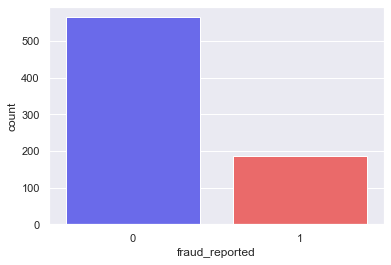

In [120]:
#dist of dv
sns.countplot(x=y_train, palette='seismic');

565 185


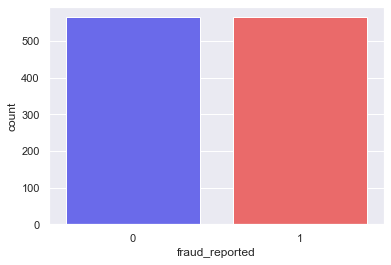

In [121]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

# Logistic Regression

In [122]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            
            }

    
rs_lr3 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr3.fit(x_train, y_train)
print(rs_lr3.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1456.3484775012444}


C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# KNN

In [123]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn3 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn3.fit(x_train, y_train)
print(rs_knn3.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


# Random Forest

In [124]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf3 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf3.fit(x_train, y_train)
print(rs_rf3.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


# XGBoost

In [125]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg3 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg3.fit(x_train, y_train)
print(rs_xg3.best_params_)

{'reg_lambda': 0.05, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 5, 'gamma': 0, 'eta': 0.05}


# Adaboost

In [126]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab3 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab3.fit(x_train, y_train)
print(rs_ab3.best_params_)

{'n_estimators': 400, 'learning_rate': 0.5}


In [127]:
classifiers3={'logreg3':rs_lr3, 'knn3':rs_knn3, 'Ranfor3':rs_rf3, 
             'XGB3':rs_xg3, 'AdaBoost3':rs_ab3, }

for key, value in classifiers3.items(): 
    print(scores(value,key))
    print("_________________")
    print(" ")

logreg3 classification metric
CV scores: 0.735
train score: 0.818
test score: 0.66
Sensitivity: 0.532
Specificity: 0.702
Precision: 0.371
F1: 0.437
ROC AUC Score: 0.648
None
_________________
 
knn3 classification metric
CV scores: 0.812
train score: 1.0
test score: 0.652
Sensitivity: 0.613
Specificity: 0.665
Precision: 0.376
F1: 0.466
ROC AUC Score: 0.631
None
_________________
 
Ranfor3 classification metric
CV scores: 0.92
train score: 0.999
test score: 0.8
Sensitivity: 0.532
Specificity: 0.888
Precision: 0.611
F1: 0.569
ROC AUC Score: 0.829
None
_________________
 
XGB3 classification metric
CV scores: 0.929
train score: 1.0
test score: 0.804
Sensitivity: 0.597
Specificity: 0.872
Precision: 0.607
F1: 0.602
ROC AUC Score: 0.818
None
_________________
 
AdaBoost3 classification metric
CV scores: 0.904
train score: 0.964
test score: 0.788
Sensitivity: 0.597
Specificity: 0.851
Precision: 0.569
F1: 0.583
ROC AUC Score: 0.794
None
_________________
 


# Ensemble

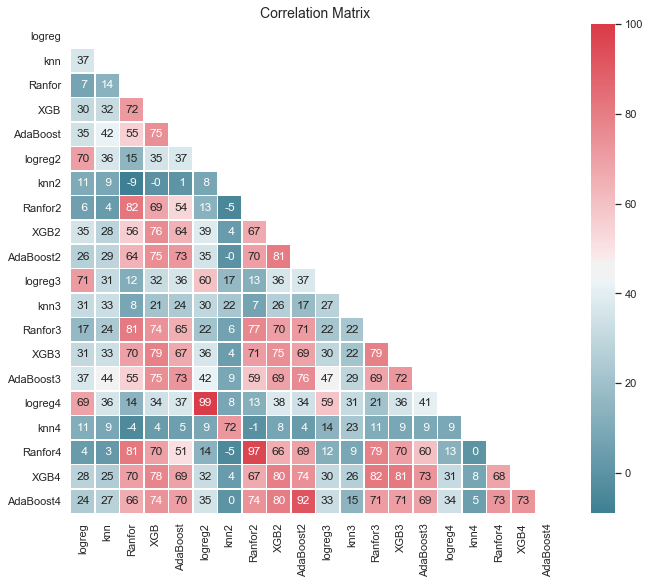

In [128]:
class_dict = {**classifiers, **classifiers2, **classifiers3, **classifiers4}

Pr = pd.DataFrame(columns=['logreg', 'knn', 'Ranfor', 'XGB', 'AdaBoost',
                           'logreg2', 'knn2', 'Ranfor2', 'XGB2', 'AdaBoost2',
                           'logreg3', 'knn3', 'Ranfor3', 'XGB3', 'AdaBoost3',
                           'logreg4', 'knn4', 'Ranfor4', 'XGB4', 'AdaBoost4'])

for key, value in class_dict.items():
    
    Pred = value.best_estimator_.predict(x_test)
    Pr[key] = Pred
    

sns.set_style("white")    
ax = corrmat(Pr.corr())

#The tree models selected are:

Logistic regression with SMOTE (F1: 0.41)
KNN with bootstrapping (F1: 0.42)
Weighted XGBoost (F1: 0.72)

# 1. Max voting without oversampling

In [129]:
#have to redefine since the bootstap has already altered the data
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [130]:
#fit best estimators into selected model
model_1 = rs_lr2.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

In [131]:
#fit best estimators into selected model
model_1 = rs_lr2.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

In [132]:
model = VotingClassifier(estimators=[('lr', model_1), 
                                     ('knn', model_2), 
                                     ('xg', model_3),
                                    ], 
                         voting='soft')

model.fit(x_train,y_train)
print("fitted")

C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fitted


In [133]:
print("Max vote w oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", round(cross_val_score(model, x_train, y_train, cv= kf).mean(),3))
print("train score:", round(model.score(x_train, y_train),3))
print("test score:", round(model.score(x_test, y_test),3))

#Evaluation metrics
predictions = model.predict(x_test)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)


# print("True Negatives: %s" % TN)
# print("False Positives: %s" % FP)
# print("False Negatives: %s" % FN)
# print("True Positives: %s" % TP)
# print('-----------------------')
print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in model.predict_proba(x_test)]
auc_score = roc_auc_score(y_test, pred_proba) 
print('ROC AUC Score:', round(auc_score,3))

Max vote w oversampling


C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sk

cross val score: 0.813
train score: 1.0
test score: 0.772
Sensitivity: 0.323
Specificity: 0.92
Precision: 0.571
F1: 0.412
ROC AUC Score: 0.804


# 2. Max voting with oversampling

In [134]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

565 185


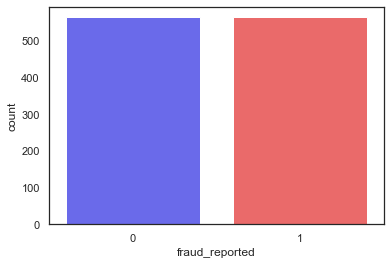

In [135]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

In [136]:
#best estimator
model_1 = rs_lr3.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

In [137]:
#soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, 


model_mv2 = VotingClassifier(estimators=[('lr', model_1), 
                                     ('knn', model_2), 
                                     ('xg', model_3),
                                    ], 
                         voting='soft')

model_mv2.fit(x_train,y_train)
print("fitted")

C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fitted


In [138]:
print("Max vote w oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", round(cross_val_score(model_mv2, x_train, y_train, cv= kf).mean(),3))
print("train score:", round(model_mv2.score(x_train, y_train),3))
print("test score:", round(model_mv2.score(x_test, y_test),3))

#Evaluation metrics
predictions = model_mv2.predict(x_test)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)

print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in model_mv2.predict_proba(x_test)]
auc_score = roc_auc_score(y_test, pred_proba) 
print('ROC AUC Score:', round(auc_score,3))

Max vote w oversampling


C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASTHA RAI-1804\AppData\Roaming\Python\Python37\site-packages\sk

cross val score: 0.907
train score: 0.996
test score: 0.72
Sensitivity: 0.581
Specificity: 0.766
Precision: 0.45
F1: 0.507
ROC AUC Score: 0.755


# 3. Blending without oversampling

In [139]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [140]:
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=42)

In [141]:
#model has been fitted above
model_1 = rs_lr3.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

#make predictions for each val data 
pred_1 = model_1.predict(x_val)
pred_2 = model_2.predict(x_val)
pred_3 = model_3.predict(x_val)


#make predictions for test data
test_pred_1 = model_1.predict(x_test)
test_pred_2 = model_2.predict(x_test)
test_pred_3 = model_3.predict(x_test)


#form a new dataset for validation and test via stacking the prediction
stack_preds = np.column_stack((pred_1, pred_2, pred_3))

stack_test_preds = np.column_stack((test_pred_1, test_pred_2, test_pred_3))

In [142]:
#specify meta model
meta_model = LogisticRegression()

lr_values = {'solver': ['liblinear'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-10, 10, 100)}
              
    
meta_rs = RandomizedSearchCV(meta_model, lr_values, cv=10, n_jobs = -1, random_state=42)
meta_rs.fit(stack_preds, y_val)
print(meta_rs.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.31257158496882353}


In [143]:
#Evaluation metrics
best_meta = meta_rs.best_estimator_
predictions = best_meta.predict(stack_test_preds)

print("Stack Ensemble w/o oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", cross_val_score(best_meta, stack_preds, y_val, cv= kf).mean())
print("val score:", best_meta.score(stack_preds, y_val))
print("test score:", best_meta.score(stack_test_preds, y_test))

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)

print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in meta_rs.predict_proba(stack_test_preds)]
auc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score:', auc_score)

Stack Ensemble w/o oversampling
cross val score: 0.9783625730994153
val score: 0.9840425531914894
test score: 0.836
Sensitivity: 0.581
Specificity: 0.92
Precision: 0.706
F1: 0.637
ROC AUC Score: 0.8266986959505834


# 4. Blending with oversampling

In [144]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

565 185


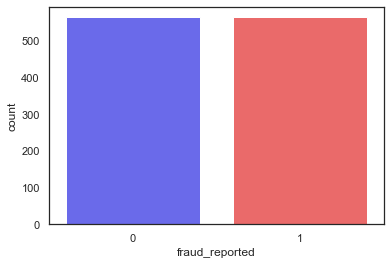

In [145]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

In [146]:
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=42)

In [147]:
model_1 = rs_lr3.best_estimator_
model_2 = rs_knn3.best_estimator_
model_3= rs_xg.best_estimator_

#make predictions for each val data 
pred_1 = model_1.predict(x_val)
pred_2 = model_2.predict(x_val)
pred_3 = model_3.predict(x_val)


#make predictions for test data
test_pred_1 = model_1.predict(x_test)
test_pred_2 = model_2.predict(x_test)
test_pred_3 = model_3.predict(x_test)


#form a new dataset for validationa and test via stacking the prediction
stack_preds = np.column_stack((pred_1, pred_2, pred_3))

stack_test_preds = np.column_stack((test_pred_1, test_pred_2, test_pred_3))

In [148]:
#specify meta model
meta_model = LogisticRegression()

lr_values = {'solver': ['liblinear'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-10, 10, 100)}
              


    
meta_rs = RandomizedSearchCV(meta_model, lr_values, cv=10, n_jobs = -1, random_state=42)
meta_rs.fit(stack_preds, y_val)
print(meta_rs.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.31257158496882353}


In [149]:
#Evaluation metrics
best_meta = meta_rs.best_estimator_
predictions = best_meta.predict(stack_test_preds)

print("Stack Ensemble w oversampling")
kf=KFold(n_splits=10, shuffle=True, random_state=42)
print("cross val score:", cross_val_score(best_meta, stack_preds, y_val, cv= kf).mean())
print("val score:", best_meta.score(stack_preds, y_val))
print("test score:", best_meta.score(stack_test_preds, y_test))

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

sensi = TP/(TP + FN)
speci= TN/(TN + FP)
preci = TP/(TP + FP)
f1= 2*(preci*sensi)/(preci+sensi)


# print("True Negatives: %s" % TN)
# print("False Positives: %s" % FP)
# print("False Negatives: %s" % FN)
# print("True Positives: %s" % TP)
# print('-----------------------')
print(f'Sensitivity: {round(sensi,3)}')
print(f'Specificity: {round(speci,3)}')
print(f'Precision: {round(preci,3)}')
print(f'F1: {round(f1,3)}')

pred_proba = [i[1] for i in meta_rs.predict_proba(stack_test_preds)]
auc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score:', auc_score)

Stack Ensemble w oversampling
cross val score: 0.9892857142857142
val score: 0.9893992932862191
test score: 0.78
Sensitivity: 0.79
Specificity: 0.777
Precision: 0.538
F1: 0.641
ROC AUC Score: 0.8266986959505834


# 4. Evaluation

In [150]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [152]:
print("Final Model: Weighted XGBoost")
print("train score:", round(rs_xg.best_estimator_.score(x_train, y_train),3))
print("test score:", round(rs_xg.best_estimator_.score(x_test, y_test),3))

Final Model: Weighted XGBoost
train score: 0.981
test score: 0.84


# Final Model: Weighted XG Boost

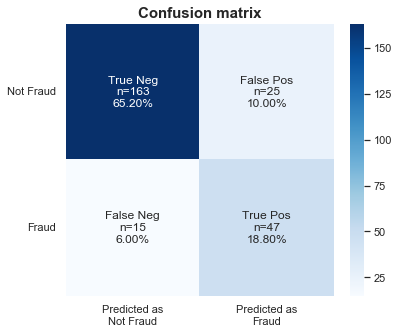

In [153]:
#confusion matrix
predictions = rs_xg.best_estimator_.predict(x_test)
cf_matrix = confusion_matrix(y_test, predictions)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

In [154]:
#classification report

predictions = rs_xg.best_estimator_.predict(x_test)
print(classification_report(y_test, predictions, target_names=['Not Fraud',"Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.87      0.89       188
       Fraud       0.65      0.76      0.70        62

    accuracy                           0.84       250
   macro avg       0.78      0.81      0.80       250
weighted avg       0.85      0.84      0.84       250



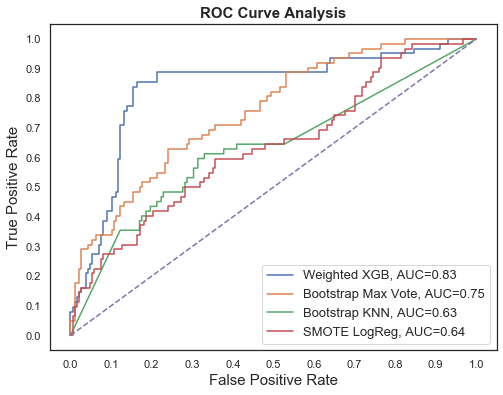

In [155]:
# Instantiate the classfiers and make a list
classifiers_name = [rs_xg.best_estimator_, 
                   model_mv2, 
                   rs_knn3.best_estimator_,
                   rs_lr2.best_estimator_]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_name:
    yproba = cls.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table['names'] = ['Weighted XGB', 'Bootstrap Max Vote', 'Bootstrap KNN','SMOTE LogReg']
result_table.set_index('names', inplace=True)

#Plot the figure
fig = plt.figure(figsize=(8,6))

sns.set_style("white")

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='m', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

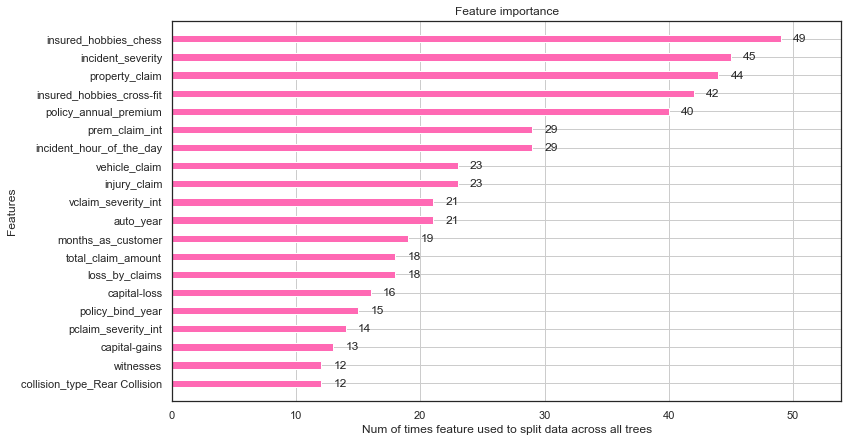

In [156]:
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(rs_xg.best_estimator_, importance_type='weight', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Num of times feature used to split data across all trees',
               color='hotpink');

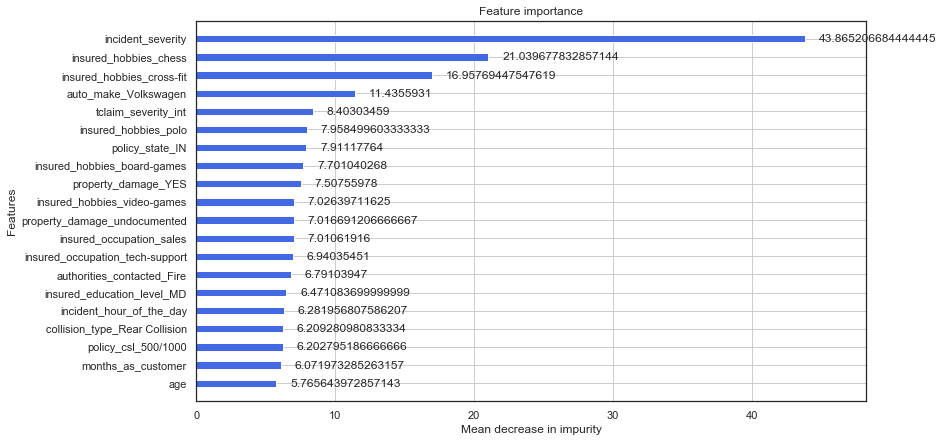

In [157]:
# plot feature importance
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(rs_xg.best_estimator_, importance_type='gain', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Mean decrease in impurity', color='royalblue');